<h1 style="text-align: center;">TP2 - Desenvolvimento de Serviços Web e Testes com Java</h1>

| ![Logo Infnet](https://mir-s3-cdn-cf.behance.net/projects/404/9115f025917929.5547cdc9cda40.jpg) |
|:-------------------------------------------------------------------------:|


<h5 style="text-align: center;">Professor: Bernardo Prattes || Estudante: Paulo Henrique de Paula Dias</h5>

<h5 style="text-align: center;">Data limite: 19/05/2025</h5>

##### Links úteis:

Repositório Git Hub - [Link](https://github.com/PAULOHENRIQUEDEPAULADIAS/Paulo_Dias_TJ_TP2)

### Entregáveis

* Código-fonte Java completo com classes de produção e testes.
* Testes unitários usando JUnit e Mockito.
* Comentários no código explicando o papel dos testes e dublês.

### Ponto de Partida

Você foi contratado por uma startup de saúde para desenvolver uma API web em Java responsável por calcular reembolsos de consultas médicas. O sistema deve estar preparado para lidar com diferentes regras de planos de saúde e requisitos futuros. Como a empresa tem foco em qualidade, espera-se que você desenvolva os testes unitários antes da implementação, inspirando-se na prática de TDD (Test-Driven Development).

<h3>O que é TDD? (Test-Driven Development)</h3><br>
O TDD é uma prática de desenvolvimento onde você escreve primeiro os testes, e só depois implementa o código que faz os testes passarem.<br>

Ciclo do TDD:<br>
* Red: Escreva um teste para algo que ainda não existe. O teste falha (isso é esperado).<br>
* Green: Implemente o mínimo necessário para o teste passar.<br>
* Refactor: Com o teste passando, melhore o código mantendo os testes funcionando.<br>

Exemplo Simples:<br>


    @Test  
    public void deveSomarDoisNumeros() {
        Calculadora calc = new Calculadora();
        assertEquals(5, calc.somar(2, 3));
    }
    
    public class Calculadora {
        public int somar(int a, int b) {
        return a + b;
        }
    }
  
Lembre-se:<br>
Não estamos avaliando seu conhecimento sobre TDD e nem é obrigatório seguir essa prática para ser aprovado. Mas o conceito serve como guia deste TP, assim como em uma empresa real. O objetivo é ajudar você a desenvolver software mais testável, com menos erros e mais manutenção.

### Exercício 1 - Reembolso Básico

Você começará implementando a função mais simples do sistema: calcular o valor a ser reembolsado com base em um valor fixo e percentual de cobertura. Escreva um teste para validar que uma consulta de R$$ 200 com 70% de cobertura resulta em R$ 140 de reembolso.

### Resolução do exercício 1 

#### Código

    package org.example;
    
    import org.junit.jupiter.api.BeforeEach;
    import org.junit.jupiter.api.Test;
    
    import static org.junit.jupiter.api.Assertions.assertEquals;
    
    public class CalculadoraReembolsoTeste {
        CalculadoraReembolso calc;
    
        @BeforeEach
        void setup(){
            calc = new CalculadoraReembolso();
        }
    
        @Test
        void coberturaReembolsoDeCentoEQuarentaReaisQuandoValorForDeDuzentosReaisCoberturaDeSetentaPorCento(){
            double valor = 200.00;
            double cobertura = 0.7;
    
            double res = calc.calcularReembolso(valor, cobertura);
    
            assertEquals(140, res);
        }
    }


Aqui elaborei no formato global, onde temos a inicialização do atributo calc como um tipo CalculadoraReembolso (Essa não existe no momento), incluindo um setup para inicialização da variável, e por fim o teste executando e falhando.

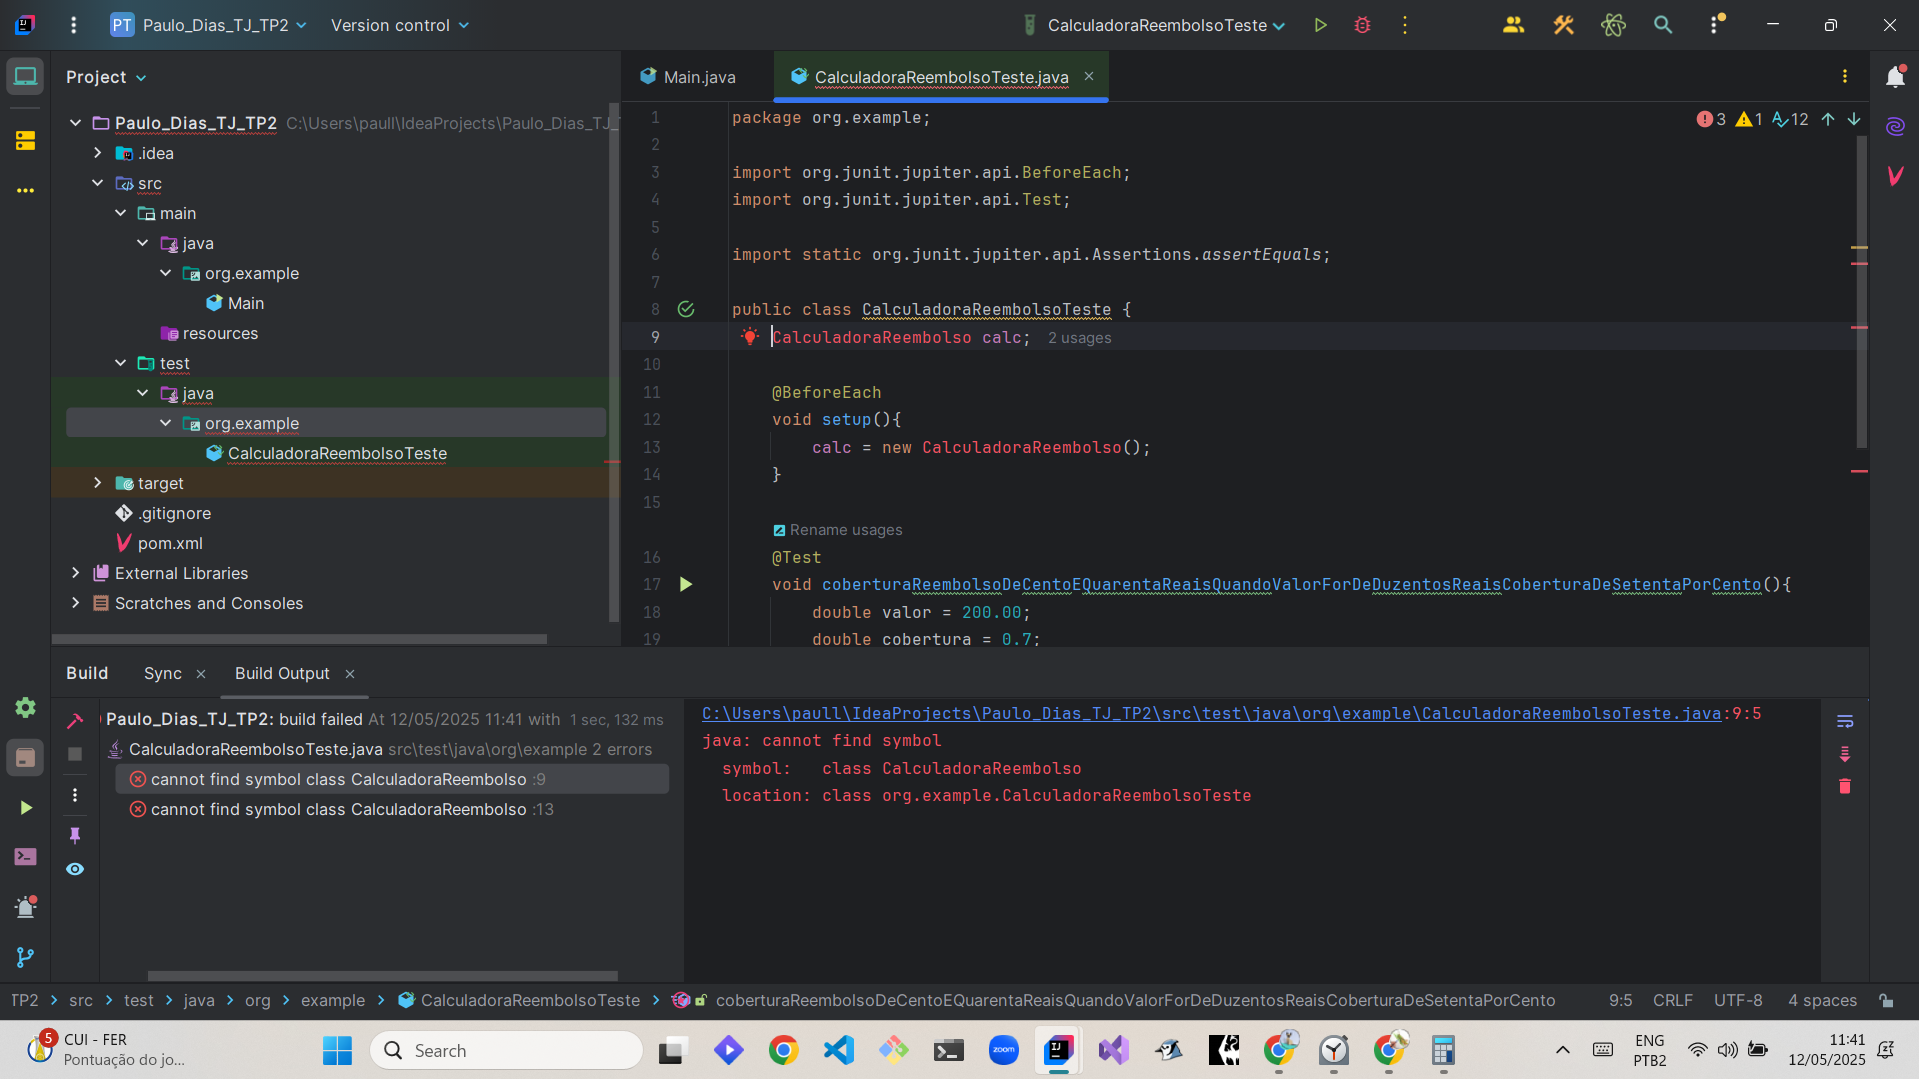

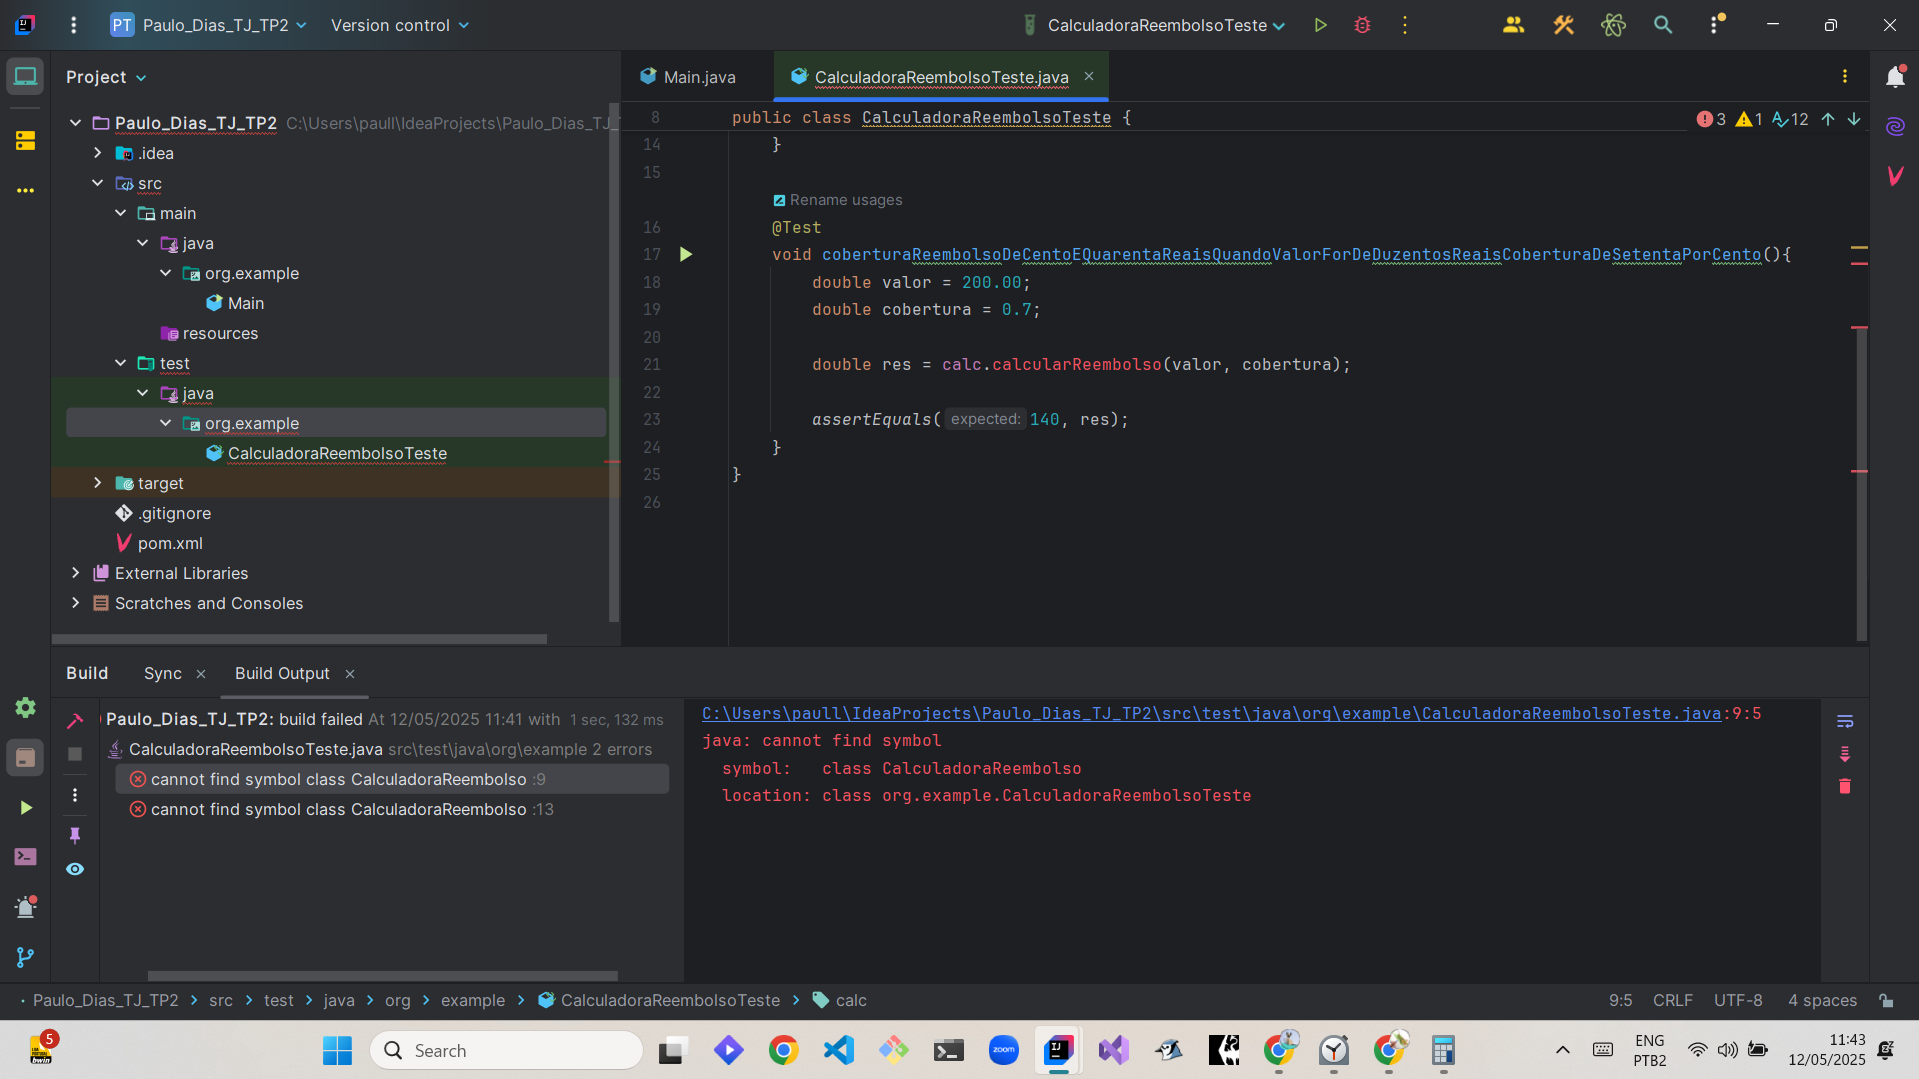

### Exercício 2 - Casos de Borda

Agora vamos testar se o sistema responde corretamente a situações limites. Teste casos em que o valor da consulta ou o percentual de cobertura sejam iguais a 0 ou 100. Isso ajuda a validar o comportamento básico da função.

### Resolução do exercício 2

#### Código

    @Test
    void coberturaReembolsoDeZeroReaisQuandoValorForDeZeroCoberturaDeSetentaPorCento(){
        double valor = 0;
        double cobertura = 0.7;

        double res = calc.calcularReembolso(valor, cobertura);

        assertEquals(0, res);
    }

    @Test
    void coberturaReembolsoDeSetentaReaisQuandoValorForDeCemReaisCoberturaDeSetentaPorCento(){
        double valor = 100.00;
        double cobertura = 0.7;

        double res = calc.calcularReembolso(valor, cobertura);

        assertEquals(70, res);
    }

Seguindo o mesmo padrão, fiz a alteração para 0 e para 100 reais. Mas como calc ainda não existe, o código não funciona.

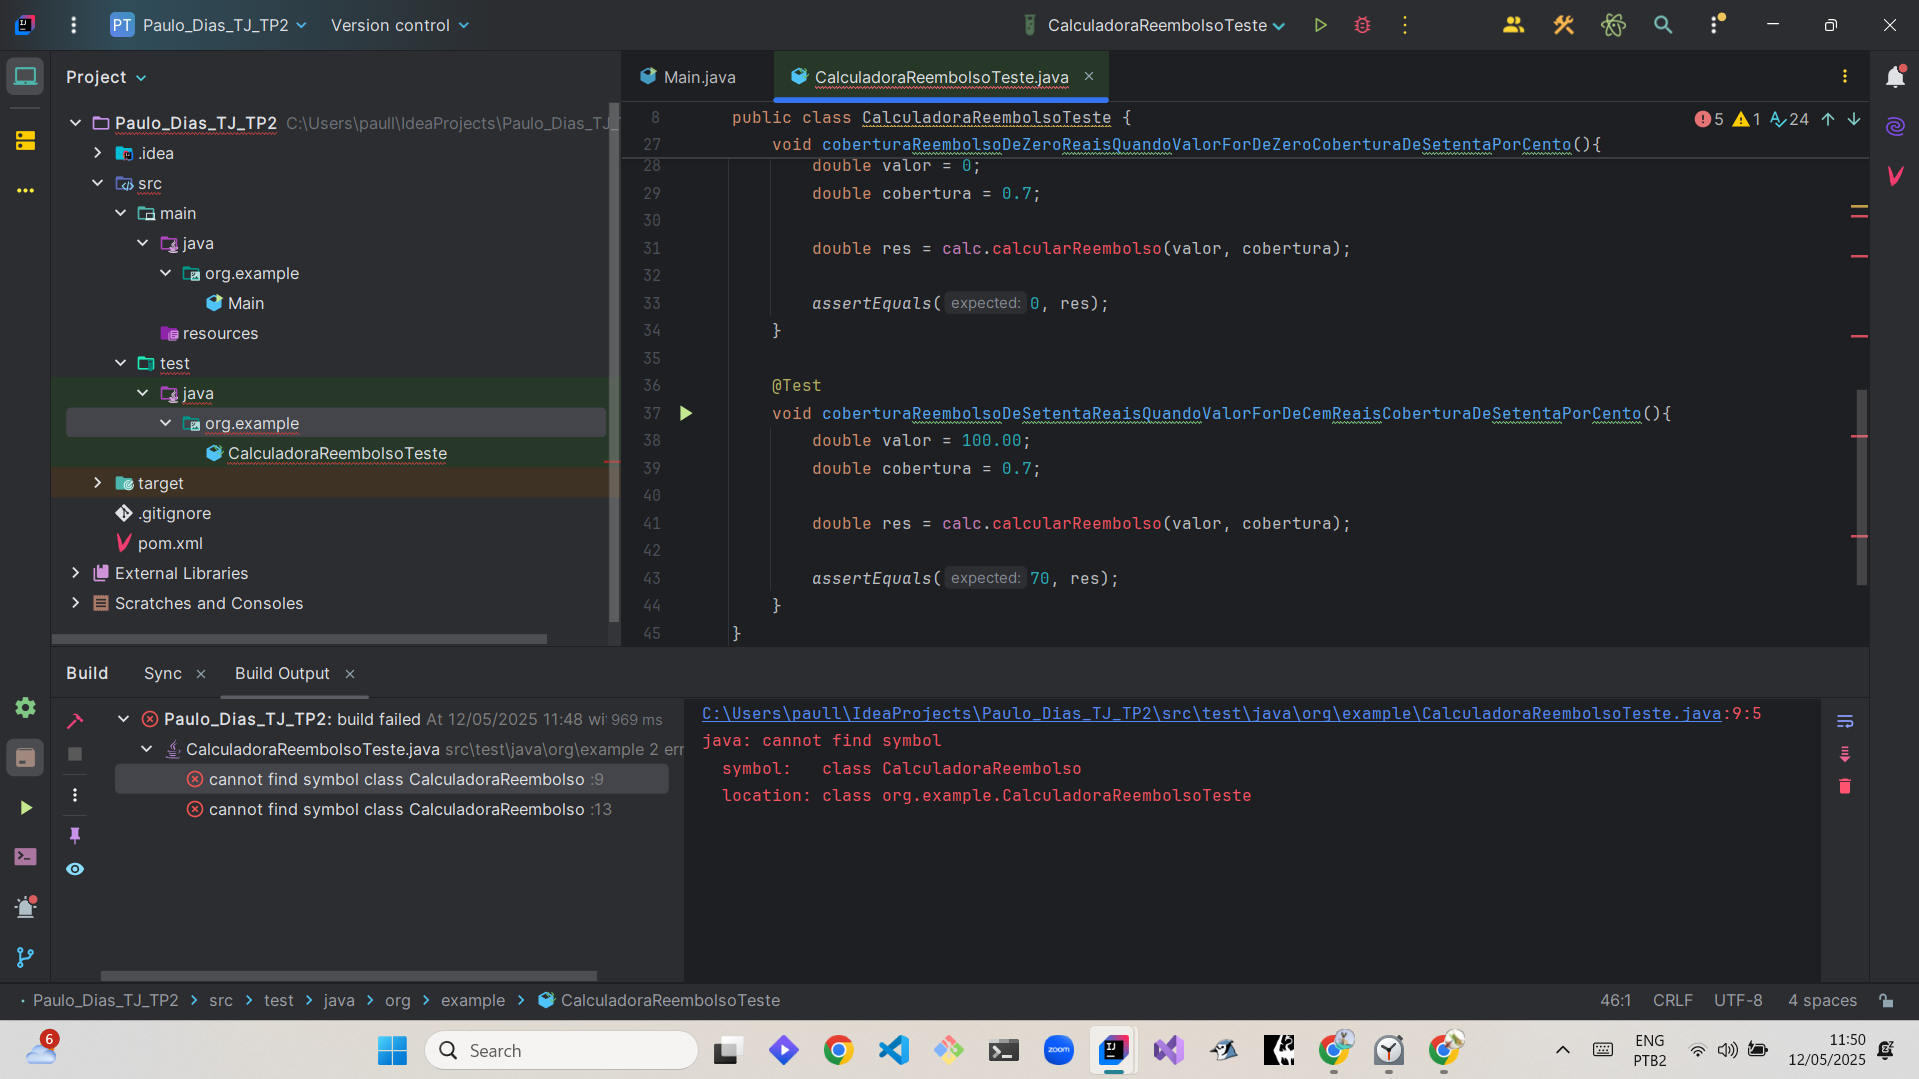

### Exercício 3 - Teste Isolado em Classe Dedicada

Organize o código criando uma classe chamada CalculadoraReembolso, onde a lógica do cálculo ficará concentrada. Os testes devem verificar apenas essa classe e não depender de mais nada para rodar.

### Resolução do exercício 3

#### Código

    package org.example;
    
    
    public class CalculadoraReembolso {
        private double valor;
        private double cobertura;
    
        public CalculadoraReembolso(){
        
        }
    
        public double calcularReembolso(double valor, double cobertura){
            return valor * cobertura;
        }
    }


Aqui criei a classe CalculadoraReembolso com seus parâmetros, construtor e método calcularReembolso. Resultou no funcionamento previsto dos testes.

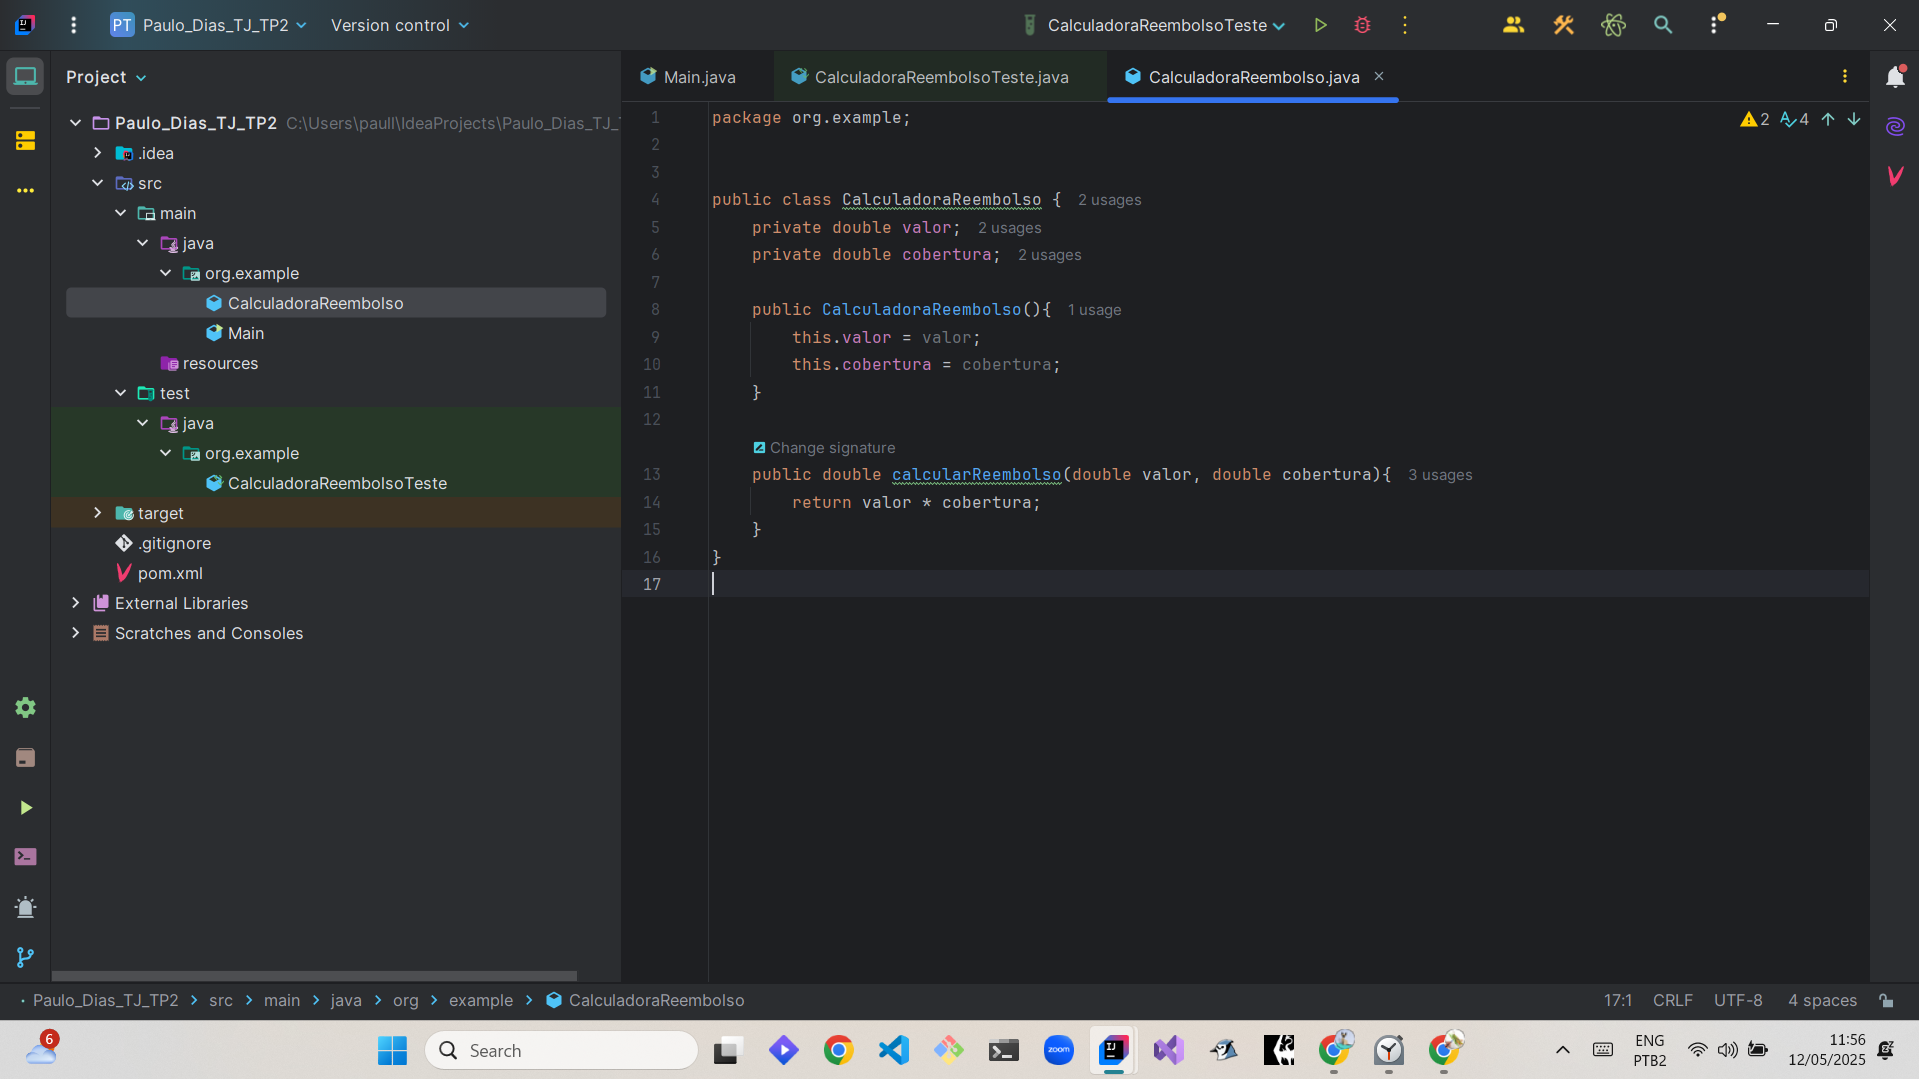

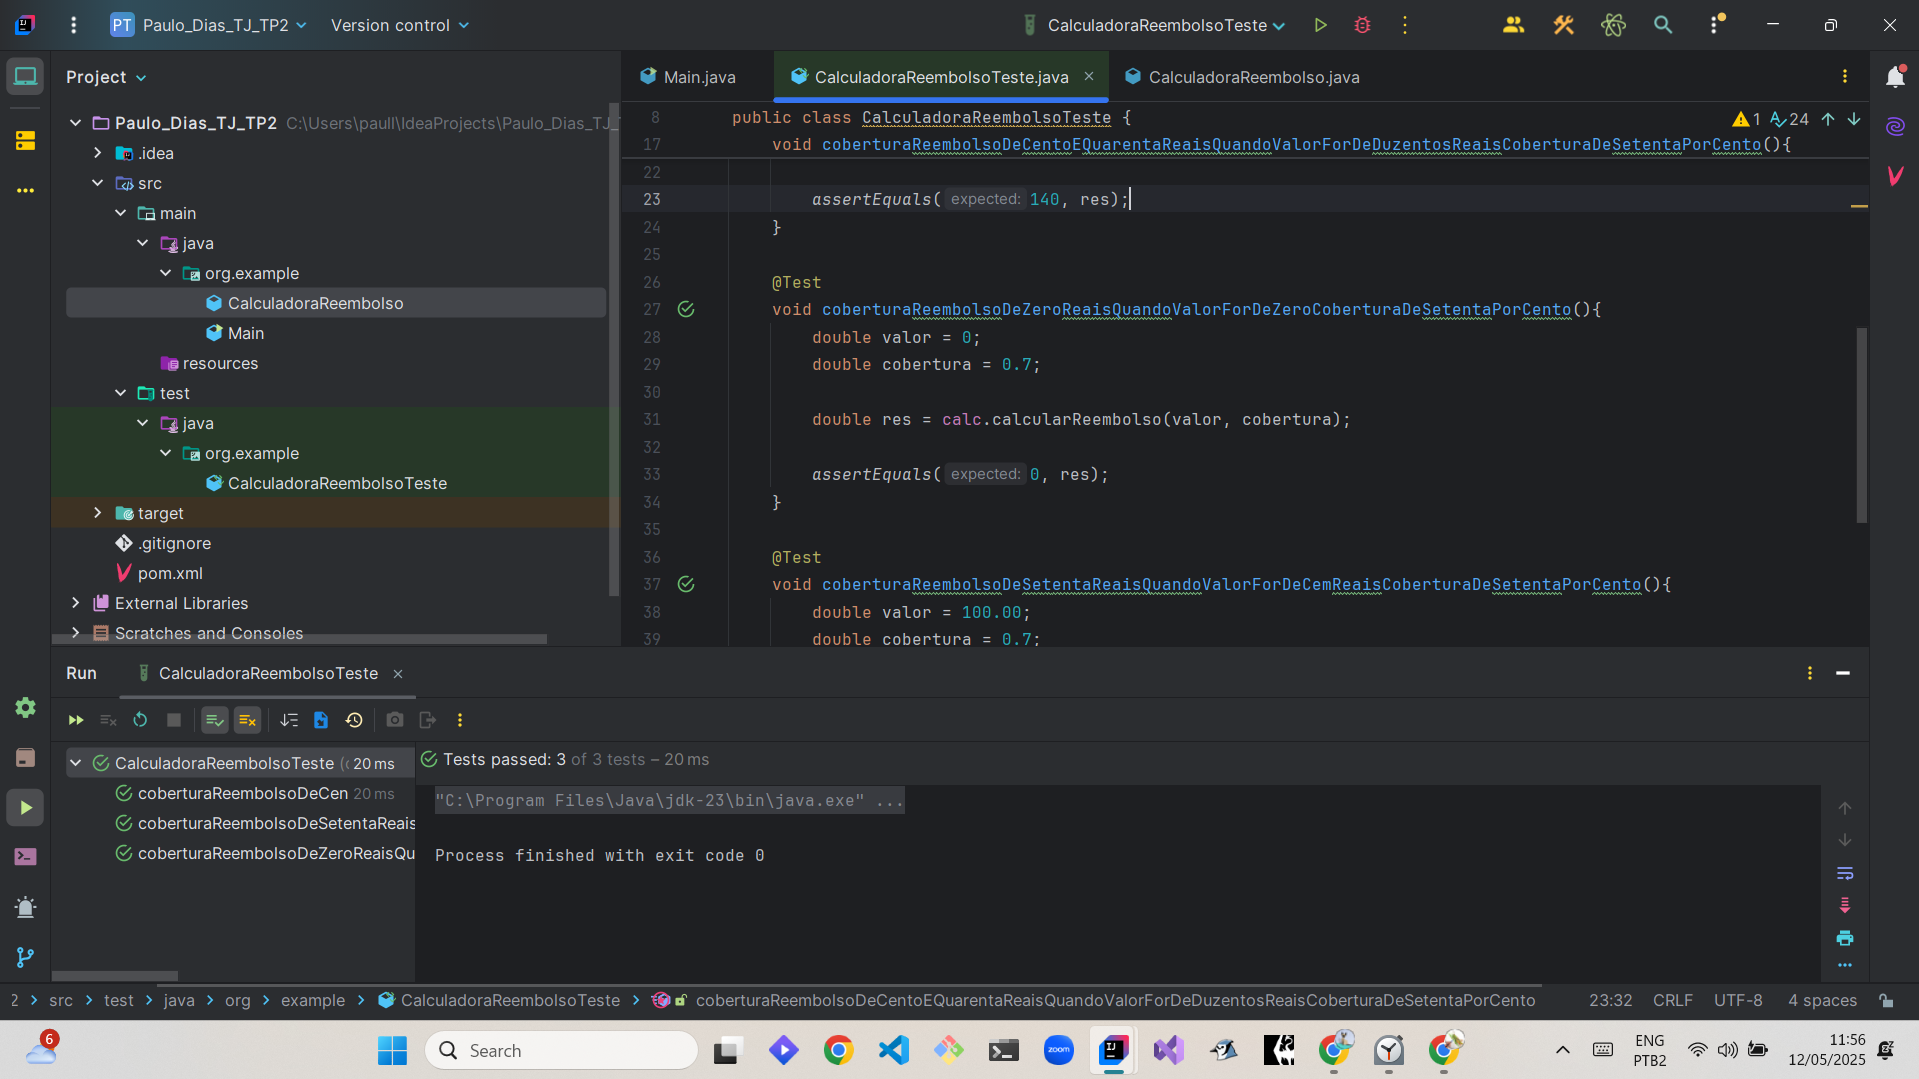

### Exercício 4 - Dummy para Paciente

O método de cálculo agora precisa receber também um objeto Paciente. Como ele ainda não será usado, crie um objeto fictício (dummy) apenas para atender à assinatura do método, sem adicionar lógica extra.

### Resolução do exercício 4

Para este caso, implementei a classe Paciente, e importei à importei para a classe CalculadoraReembolso. Este caso ficou da seguinte forma.

    package org.example;
    
    public class Paciente {
        private String nome;
    
        public Paciente(String nome){
            this.nome = nome;
        }
    }


    package org.example;
    
    
    public class CalculadoraReembolso {
        private double valor;
        private double cobertura;
        private Paciente paciente;
    
        public CalculadoraReembolso(){
       
        }
    
        public double calcularReembolso(double valor, double cobertura, Paciente paciente){
            return valor * cobertura;
        }
    }


Dentro dos testes fiz a adição de Paciente também

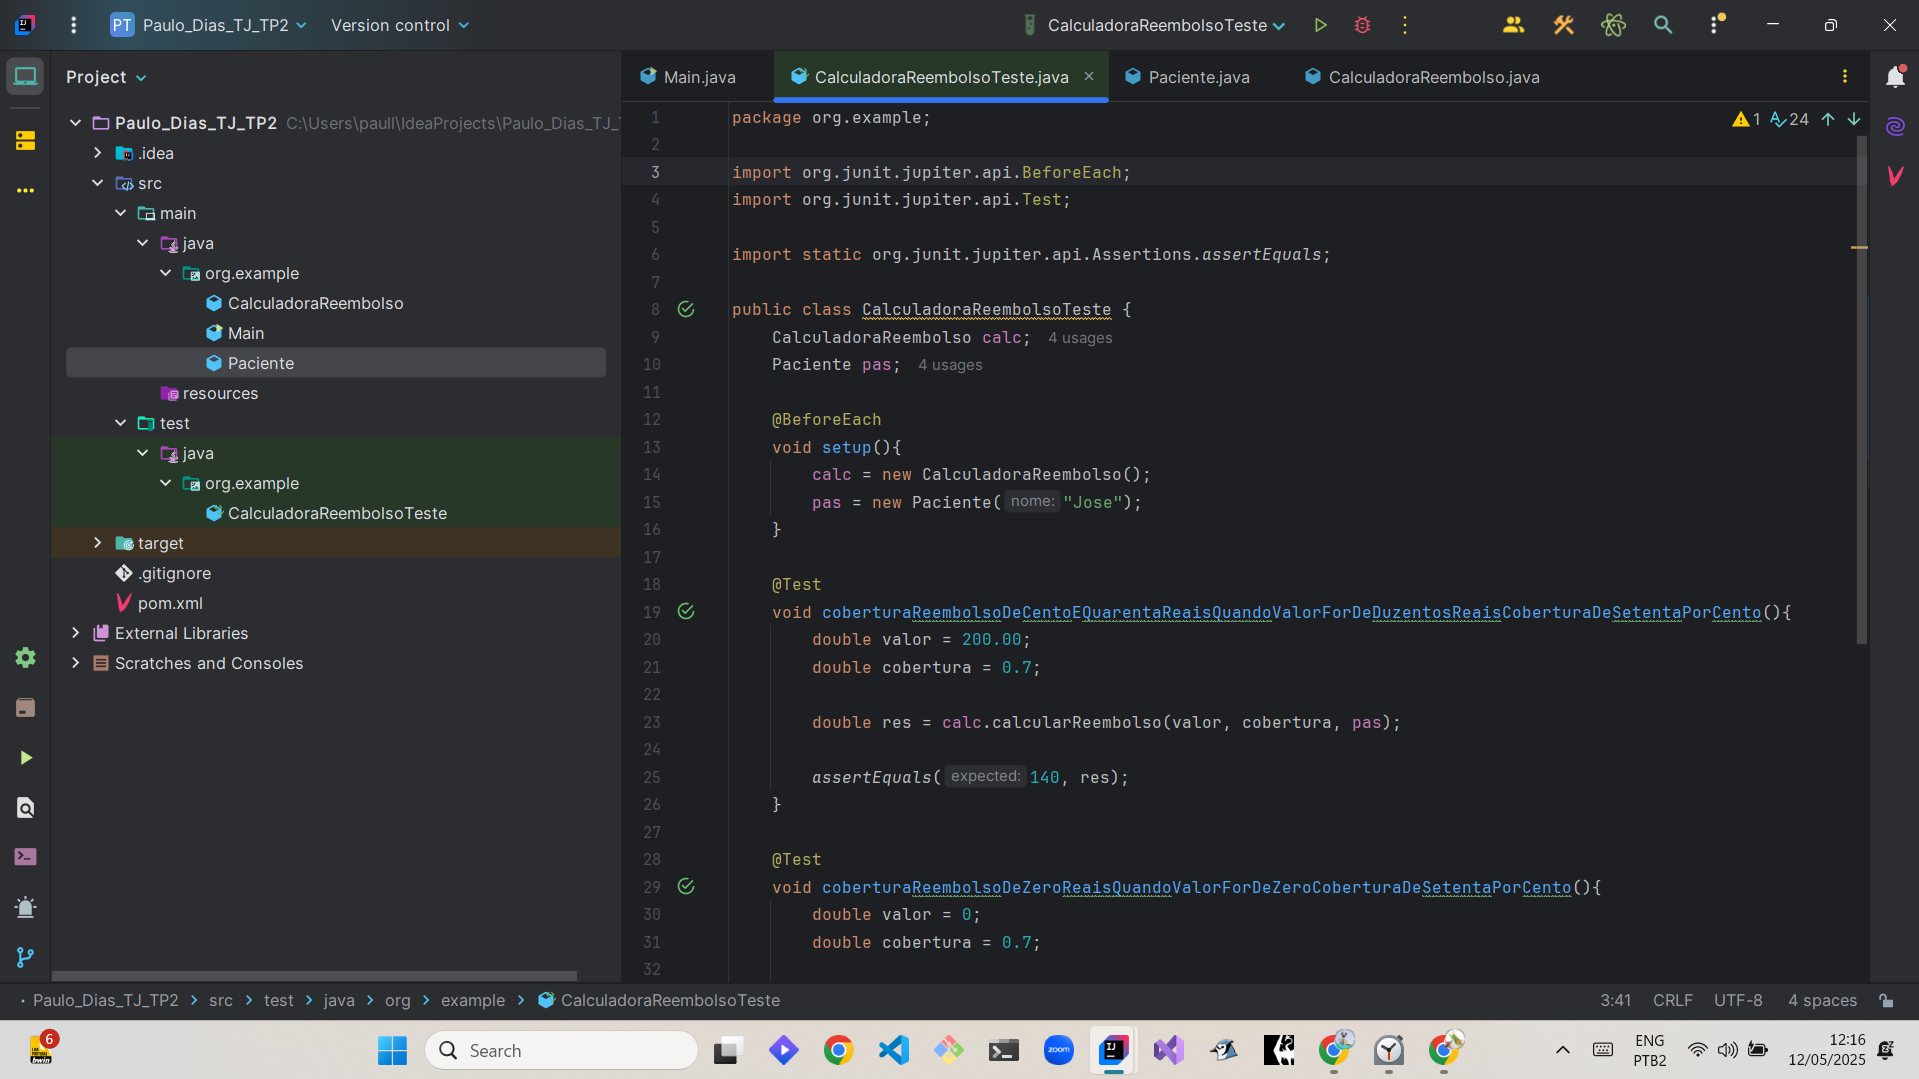

### Exercício 5 - Fake para Histórico de Consultas

Vamos simular o armazenamento de consultas anteriores com uma estrutura simples em memória. Crie uma interface HistoricoConsultas e uma versão fake que guarde os dados em uma lista, permitindo consultar depois. Isso ajuda a testar sem depender de banco de dados real.

### Resolução do exercício 5

#### Código

Implementação da classe HistoricoConsultas

    package org.example;
    
    import java.util.List;
    
    public interface HistoricoConsultas {
    
        List<String> buscaPorPaciente(Paciente paciente);
    }


Implementação do HistoricoConsultasFake

    package org.example.fakes;
    
    import org.example.HistoricoConsultas;
    import org.example.Paciente;
    
    import java.util.ArrayList;
    import java.util.HashMap;
    import java.util.List;
    import java.util.Map;
    
    public class HistoricoConsultasFake implements HistoricoConsultas {
    
        private final Map<Paciente, String> consultas = new HashMap<>();
    
        @Override
        public List<String> buscaPorPaciente(Paciente paciente) {
            List<String> res = new ArrayList<>();
    
            for (Map.Entry<Paciente, String> cliente : consultas.entrySet()){
    
                if(cliente.getKey().equals(paciente)){
                    res.add(cliente.getValue());
                }
            }
            return res;
        }
    }


O Histórico fake basicamente inicia uma variável privada de Map, e reescreve o método herdado buscaPorPaciente, onde este cria uma lista para armazenar o resultado. Faz um foreach do Map consultas (BD) verifica se a chave é igual (Nome do Paciente) adiciona a informação do paciente que será retornada.

### Exercício 6 - Stub de Plano de Saúde

Implemente uma interface PlanoSaude com um método que retorna o percentual de cobertura. Nos testes, crie stubs para simular diferentes planos com percentuais fixos, como 50% ou 80%, e garanta que o cálculo responda corretamente.

### Resolução do exercício 6

#### Código presente em PlanoSaudeSubs

    package org.example.stubs;
    
    import org.example.PlanoSaude;
    
    public class PlanoSaudeStub implements PlanoSaude {
        private double premium = 0.7;
        private double smart = 0.5;
        private double budget = 0.3;
    
    
        @Override
        public double percentualDeCobertura(String plano) {
            switch (plano){
                case "premium" : return premium;
                case "smart" : return smart;
                case "budget" : return budget;
                default: return 0;
            }
        }
    }


Neste código temos a implementação da classe PlanoSaude. Aqui foram implementados as variáveis premium, smart e budget, correspondentes a cada plano de saúde, e o método percentual de Cobertura, retorna qual percentual correspondente a cada plano. Implementação dos testes feitas no arquivo CalculadoraReembolsoTeste

    @Test
    void coberturaReembolsoDoPlanoPremium(){
        double cobertura = plano.percentualDeCobertura("premium");
        double valor = 100;

        double res = calc.calcularReembolso(valor, cobertura, pas);

        assertEquals(70, res);
    }

    @Test
    void coberturaReembolsoDoPlanoSmart(){
        double cobertura = plano.percentualDeCobertura("smart");
        double valor = 100;

        double res = calc.calcularReembolso(valor, cobertura, pas);

        assertEquals(50, res);
    }

    @Test
    void coberturaReembolsoDoPlanoBudget(){
        double cobertura = plano.percentualDeCobertura("budget");
        double valor = 100;

        double res = calc.calcularReembolso(valor, cobertura, pas);

        assertEquals(30, res);
    }

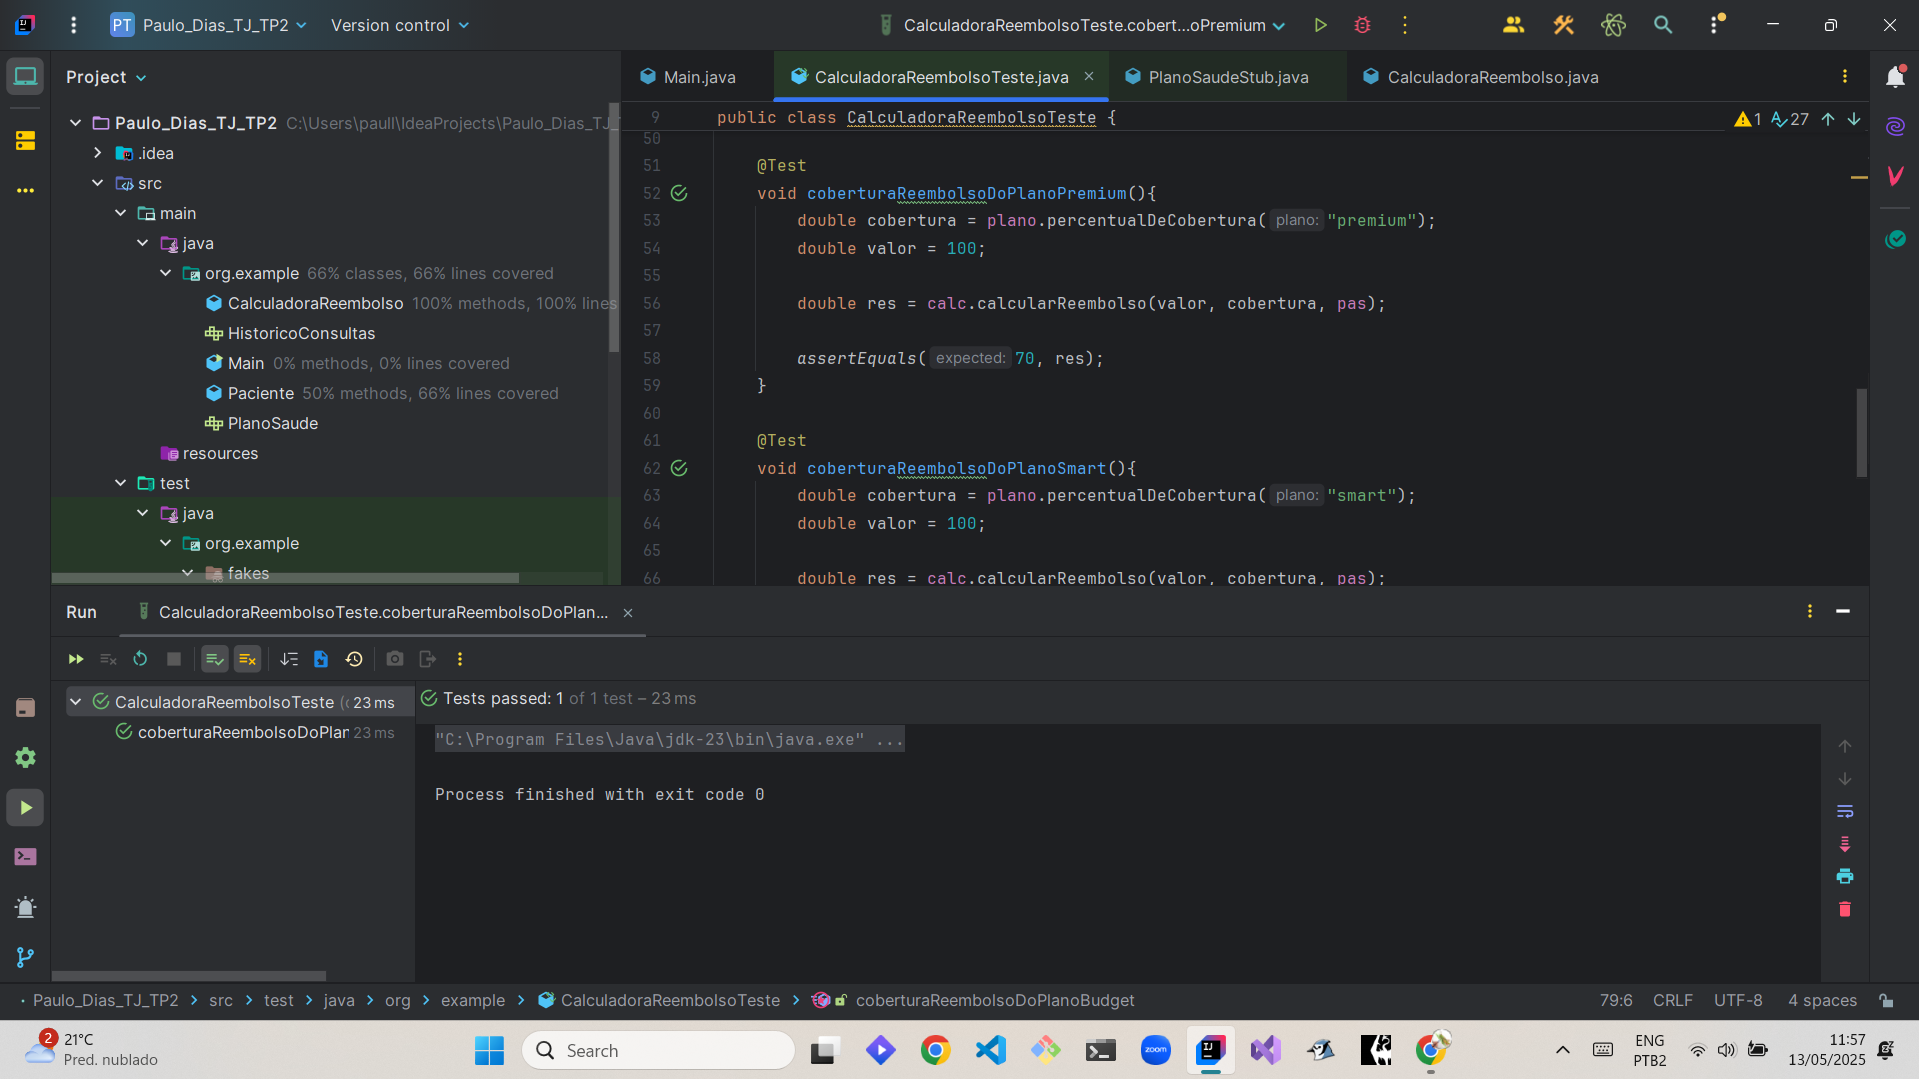

### Exercício 7 - Spy para Auditoria

Agora queremos garantir que o sistema está chamando o serviço de auditoria ao registrar uma consulta. Crie uma interface Auditoria e implemente um spy que registra se o método registrarConsulta() foi chamado durante os testes.

### Resolução do exercício 7

Primeiro realizei a criação da interface, logo implementei a interface dentro de HistoricoConsultaFake. Por último realizei o teste dentro de CalculadoraReembolsoTeste

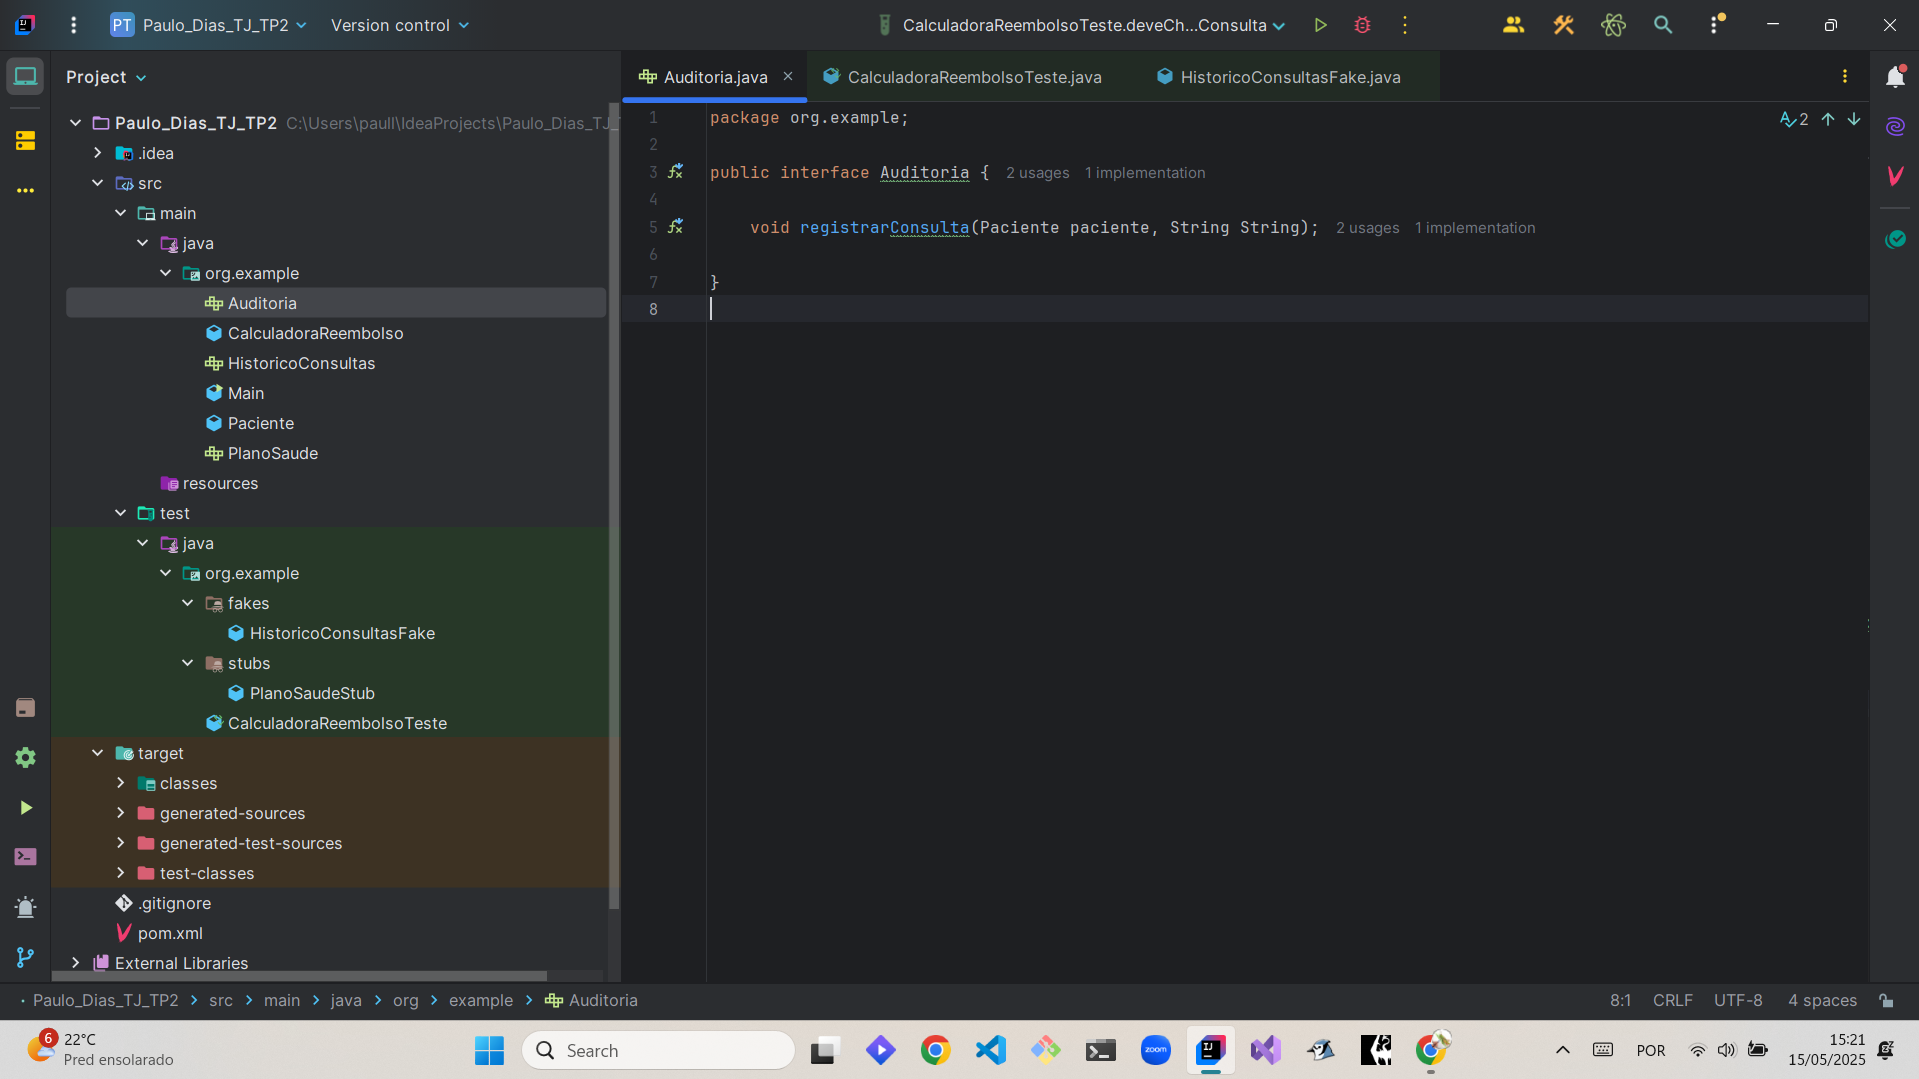

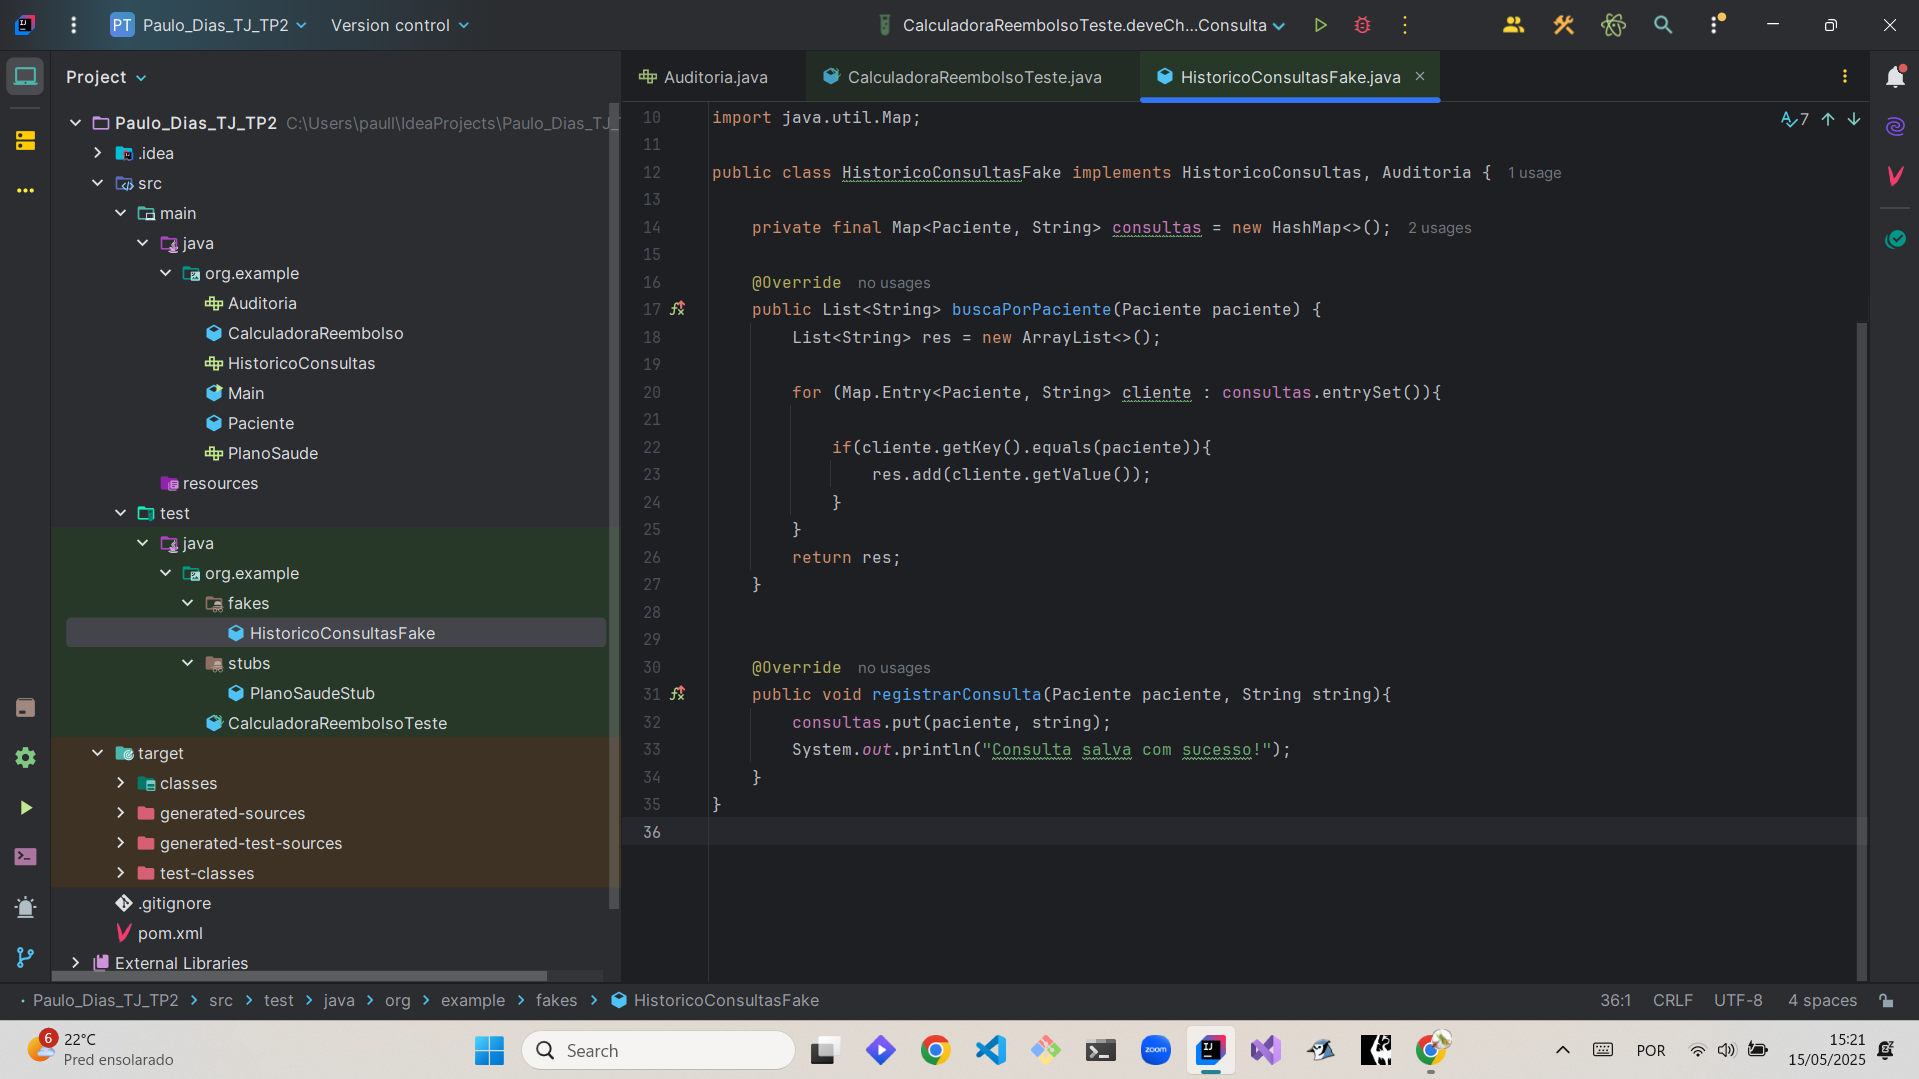

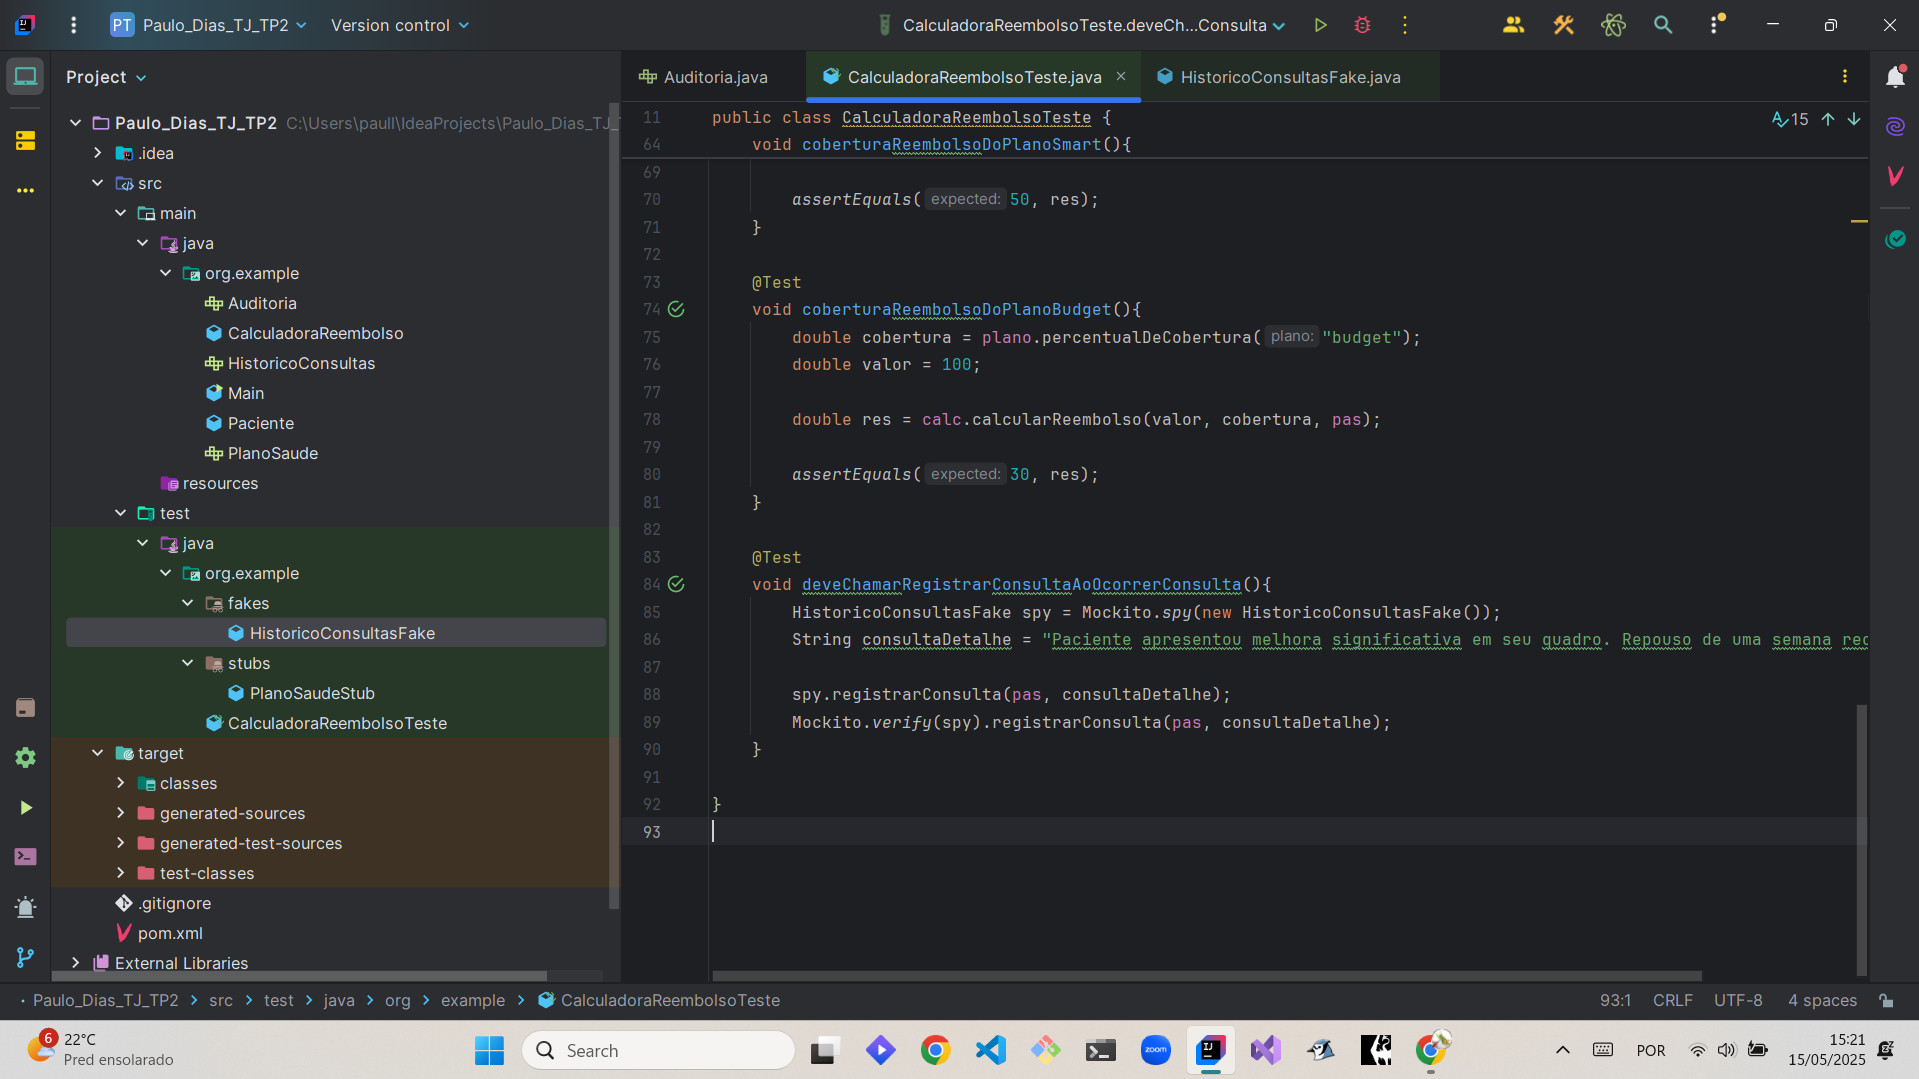

Teste executado com sucesso.

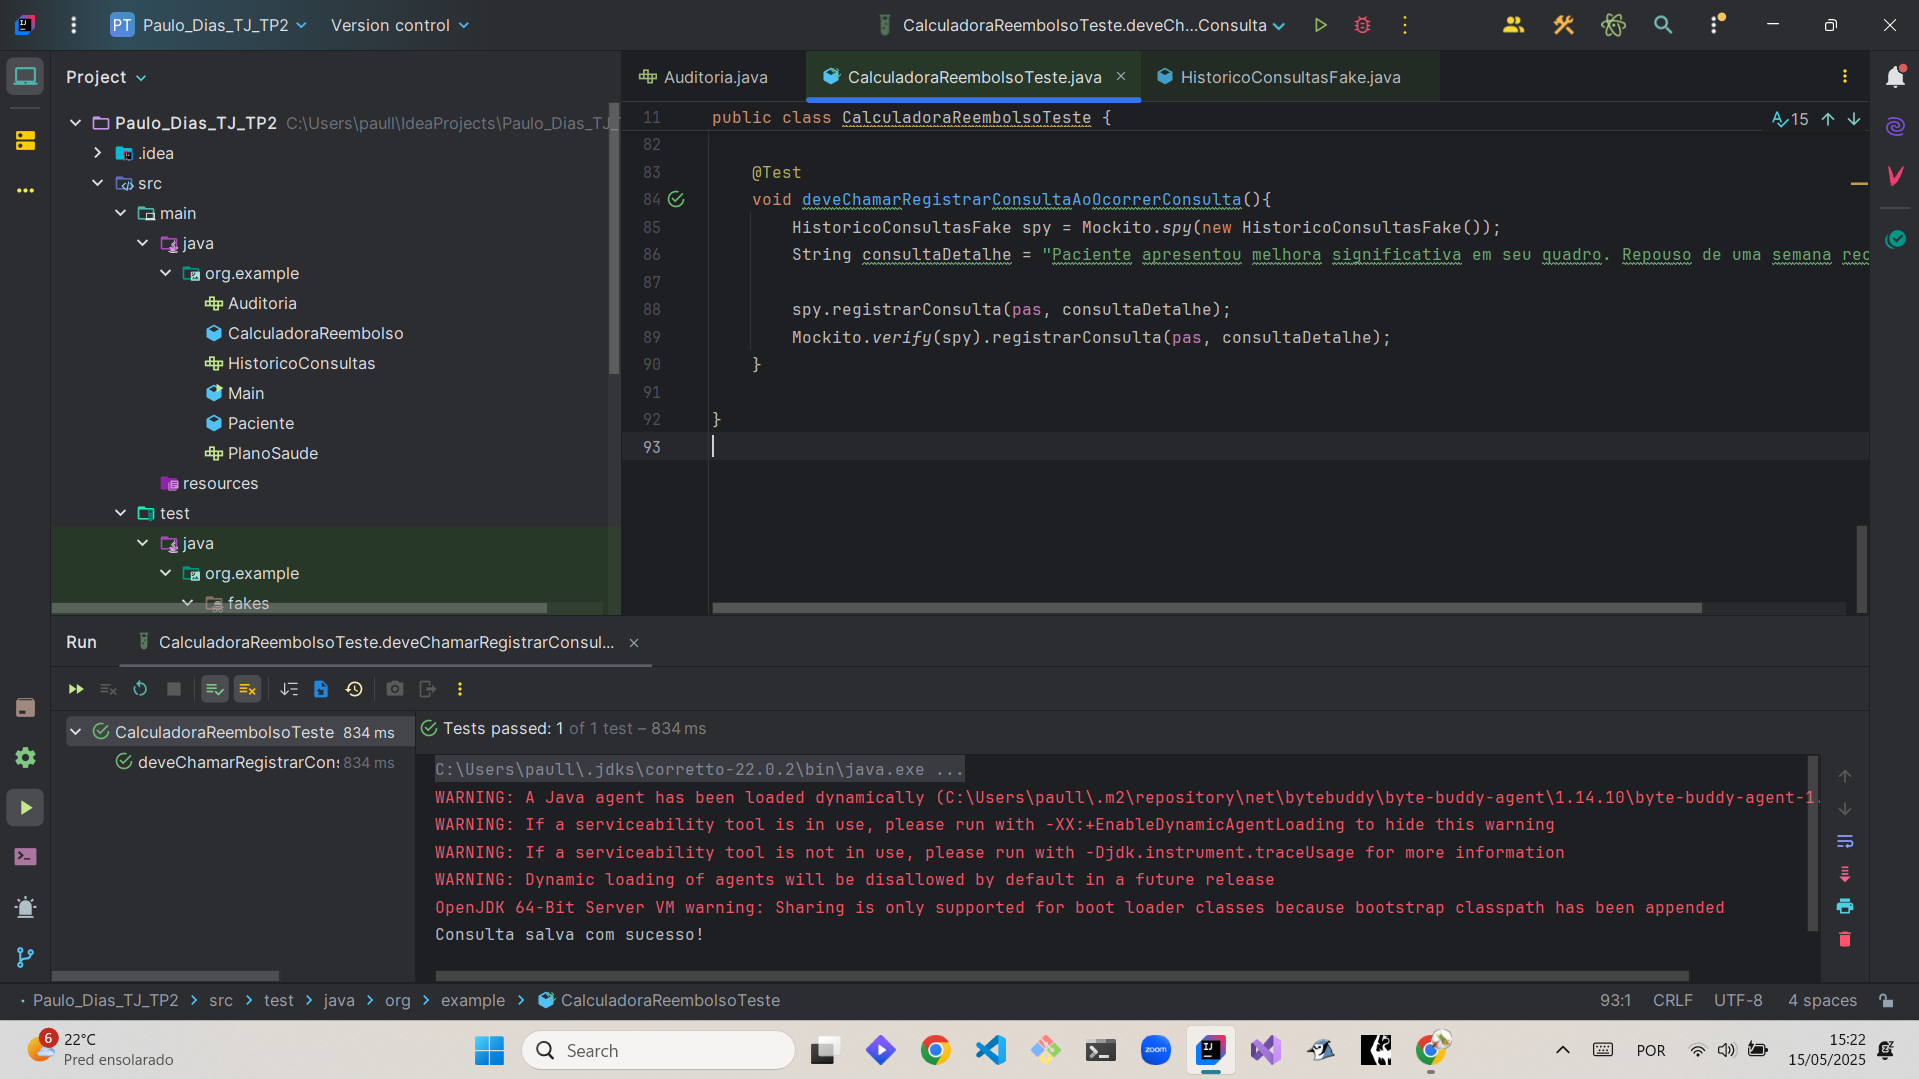

### Exercício 8 - Mock para Autorização

As regras mudaram: só se pode reembolsar consultas autorizadas. Crie uma interface AutorizadorReembolso e use Mockito para criar um mock. O mock deve simular o comportamento do autorizador e retornar falso em um dos testes. O sistema, nesses casos, deve lançar uma exceção.

### Resolução do exercício 8

Neste aso foram implementadas, a interface Validador, e dentro da classe CalculadoraReembolsoTeste foi adicionado as informações da interface para funcionamento do teste. Como já existem testes aprovados e o Mock está setado para true no setup, somente a implementação do teste false foi necessária.

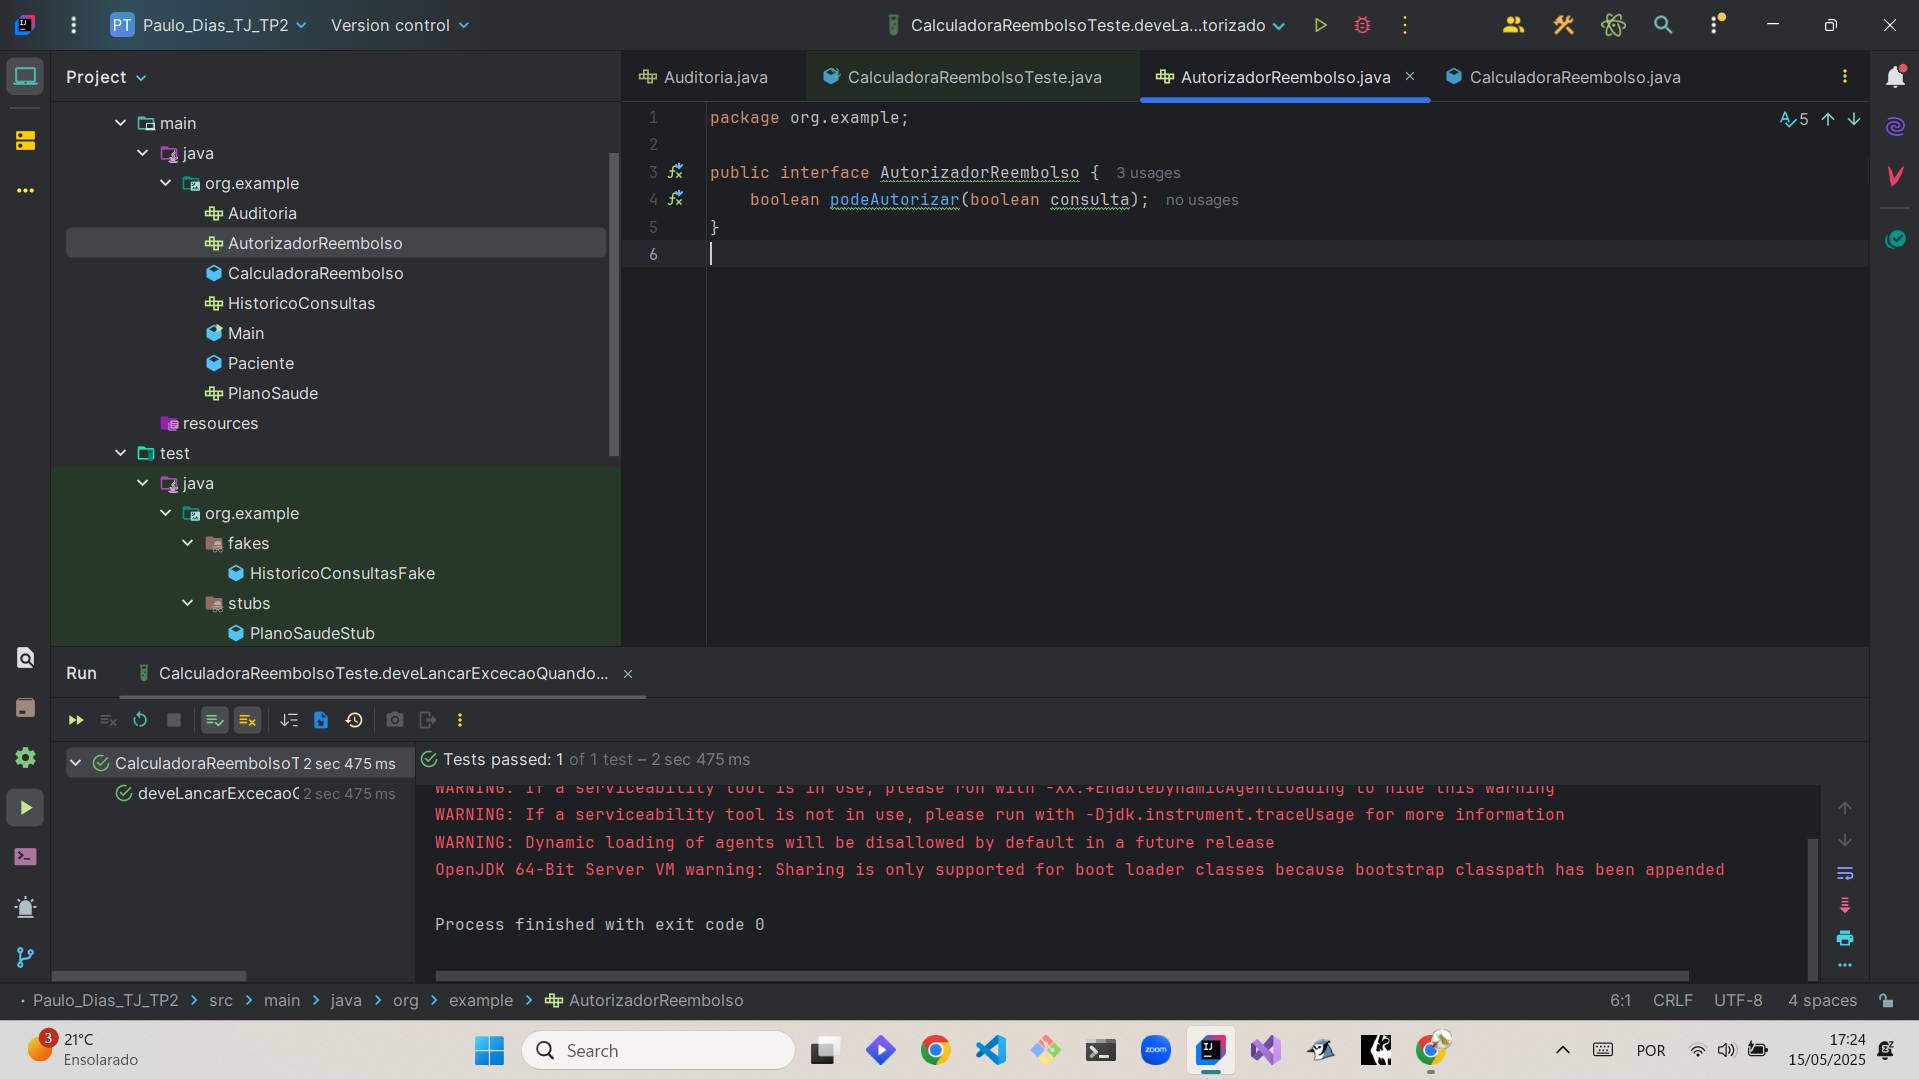

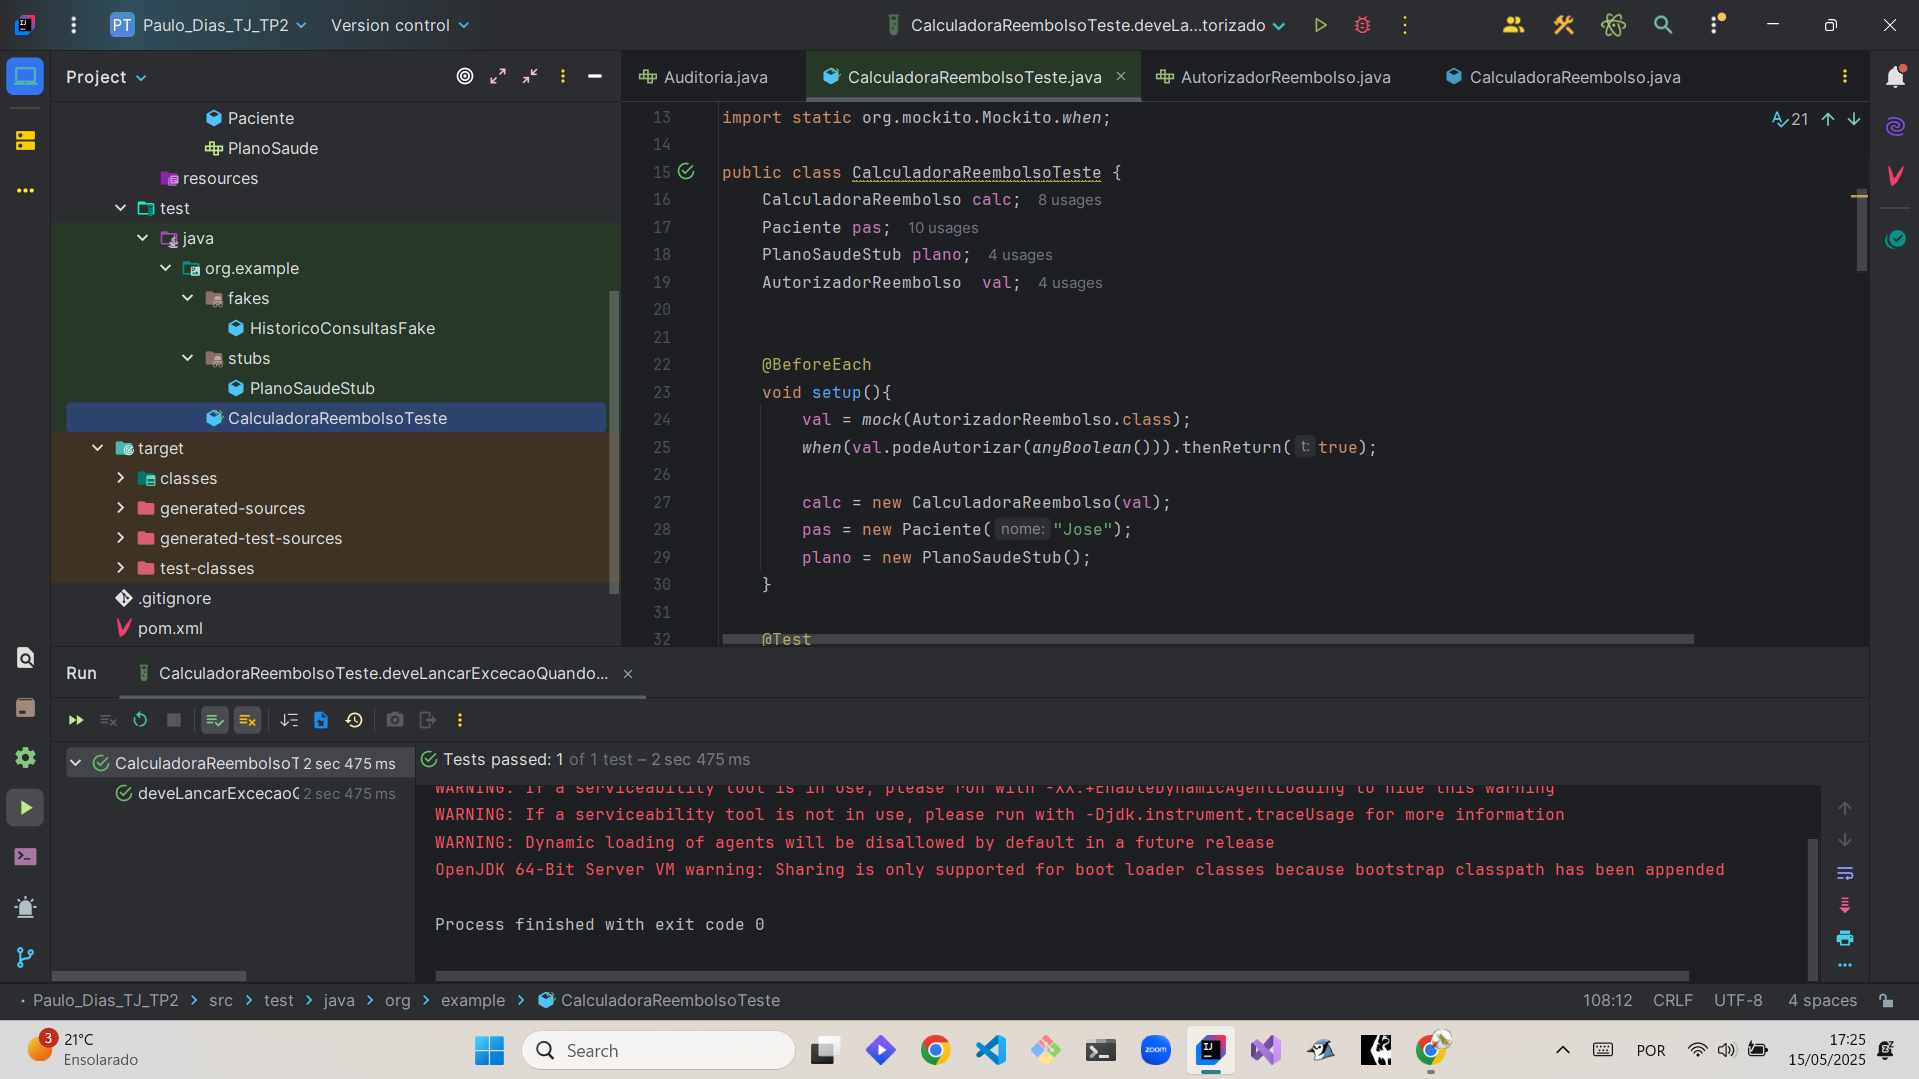

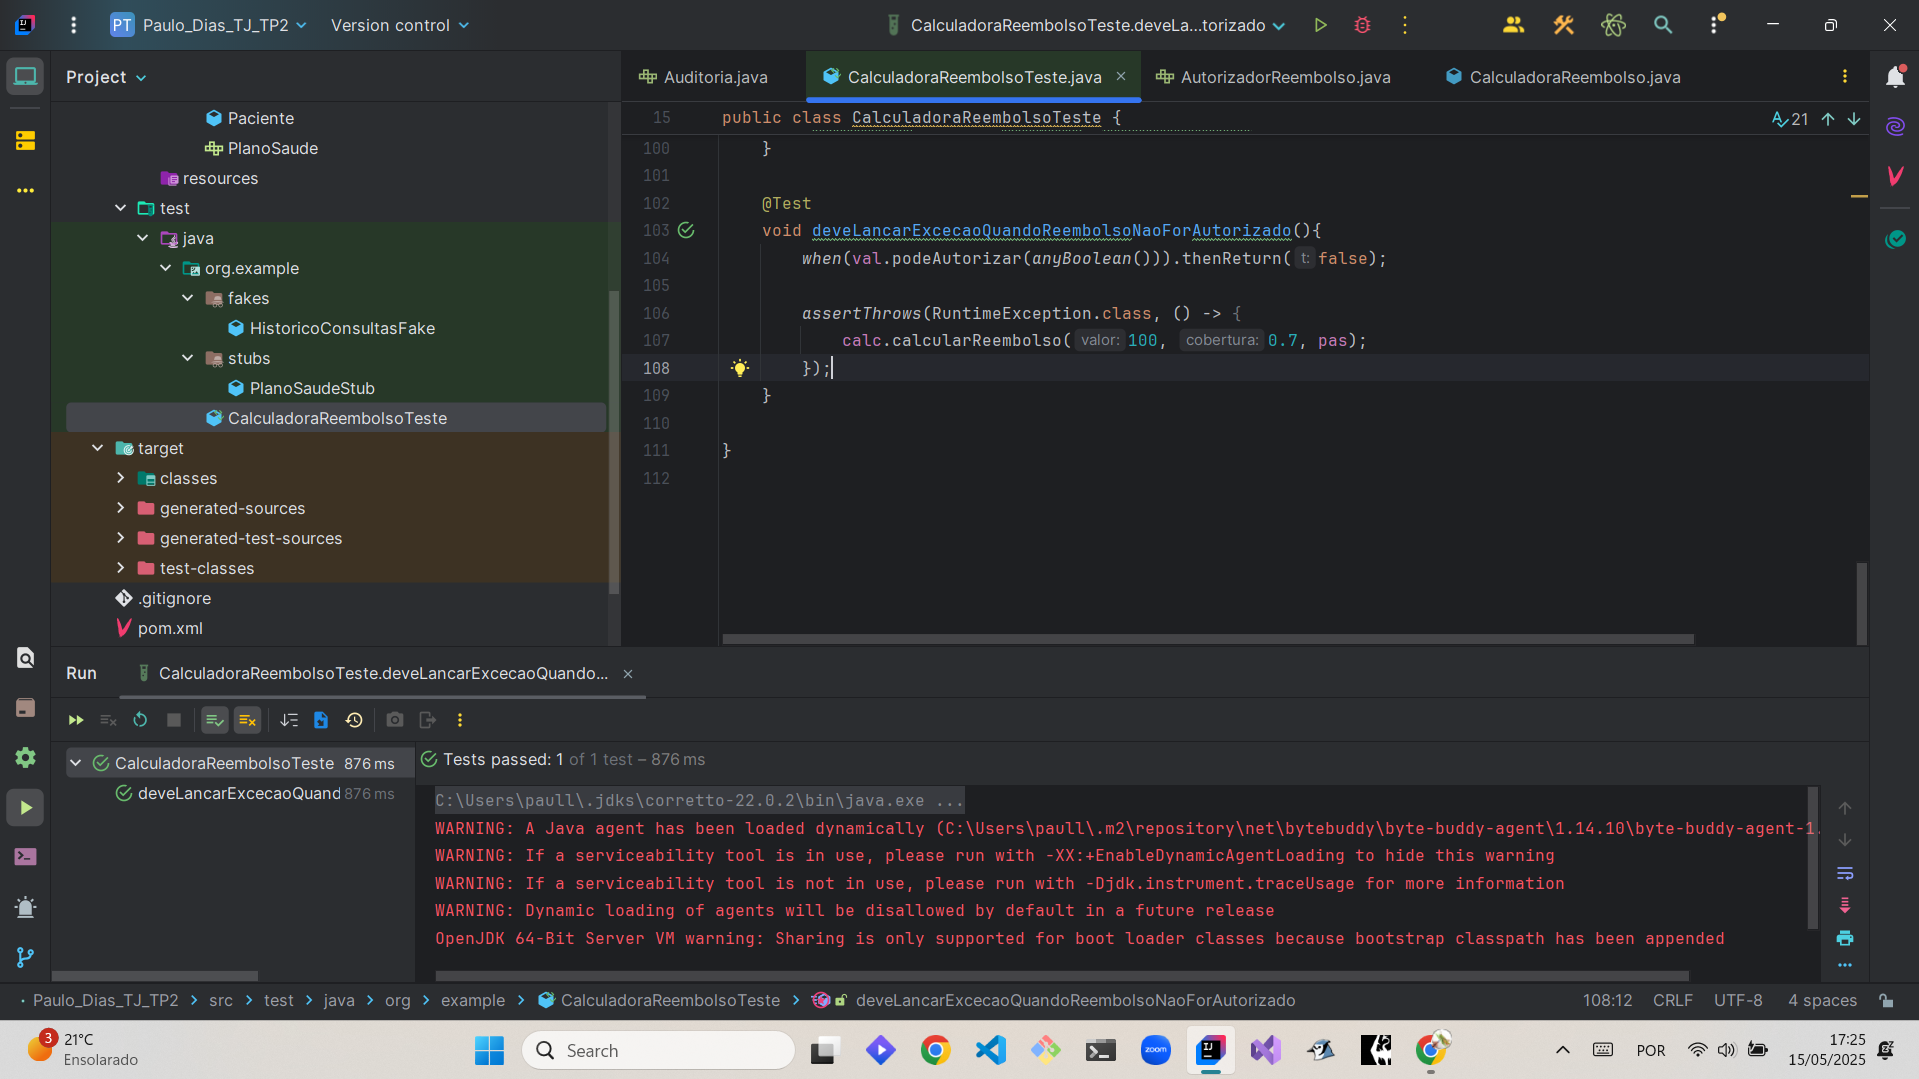

### Exercício 9 - Helper para Criação de Consultas

Comece a criar um método auxiliar para gerar objetos Consulta com dados padrão. Isso vai evitar repetição de código nos testes. Aplique esse helper em pelo menos três testes já feitos.

### Resolução do exercício 9

Para o exercício acima, criei uma classe Consulta, que faz a leitura padrão dos dados de uma consulta.

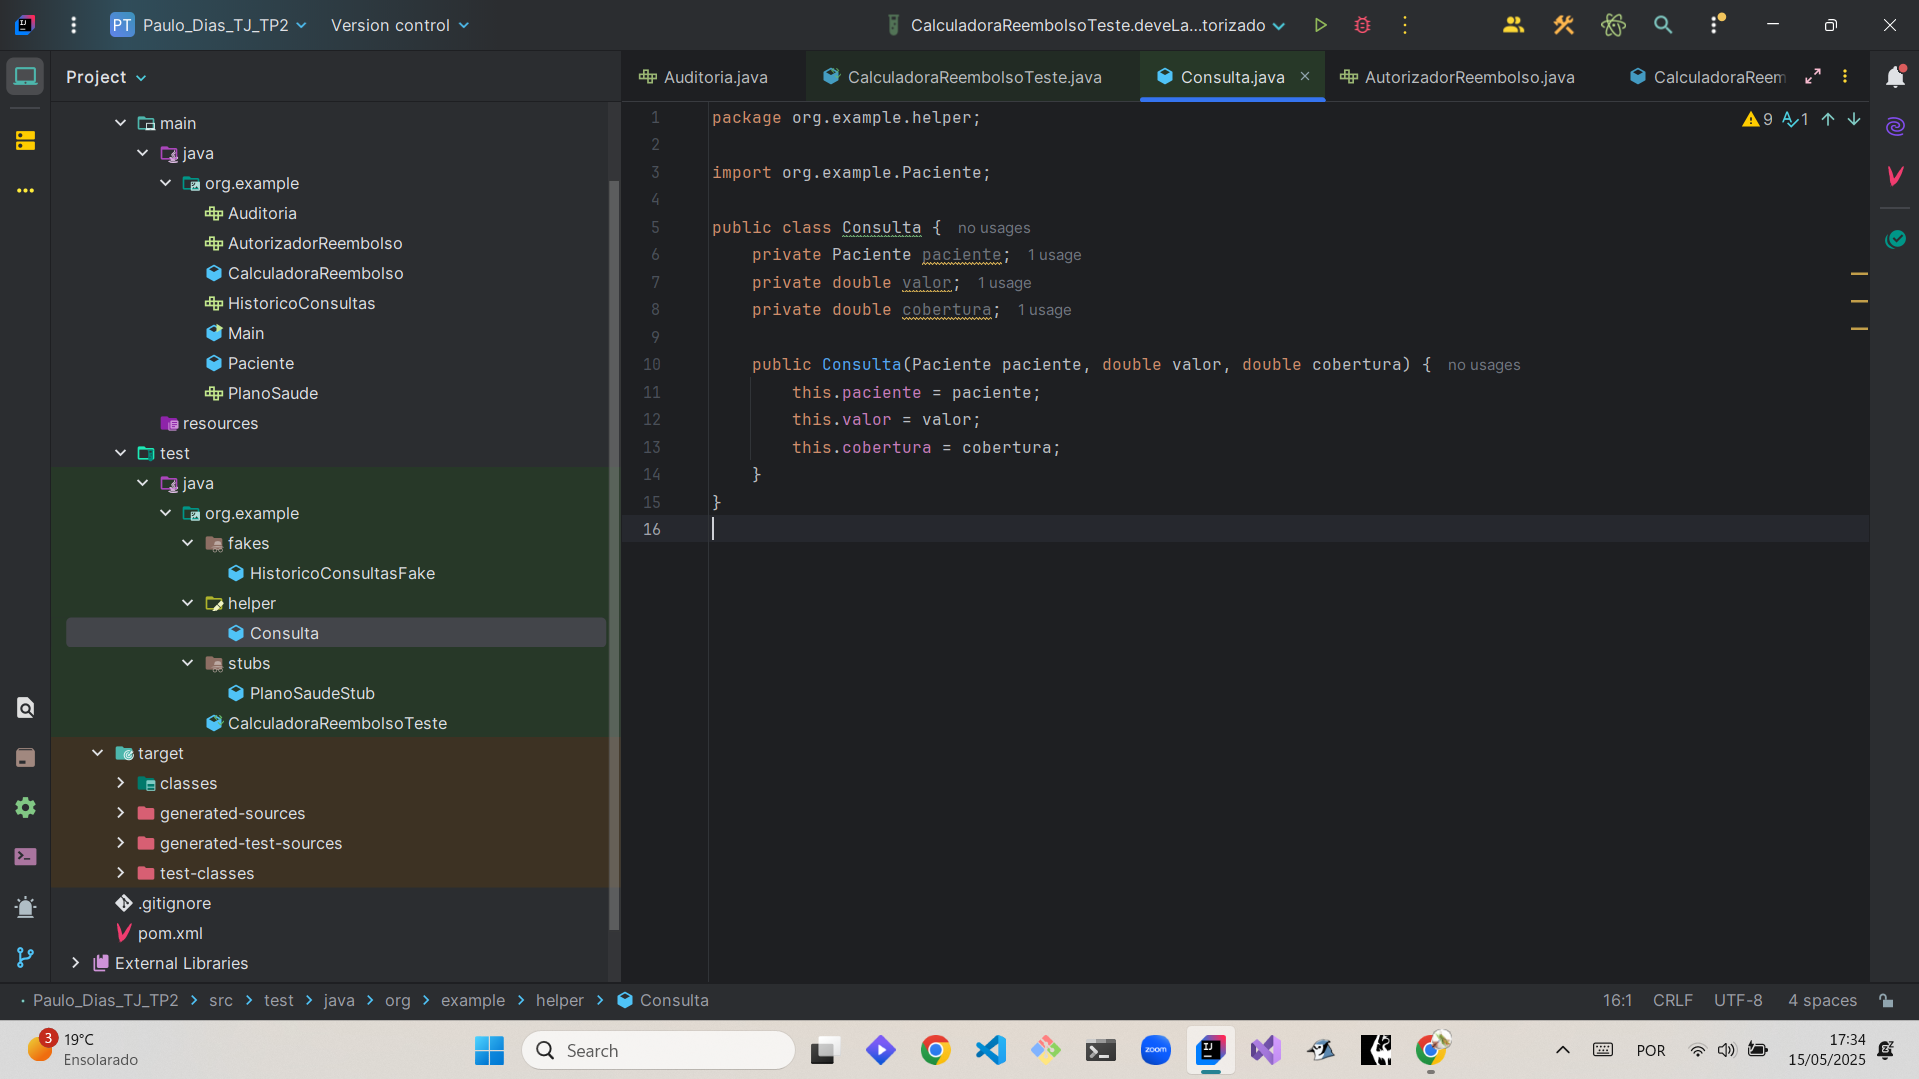

Dentro de CalculadoraReembolsoTeste criei um método que retorna um tipo Consulta, instanciando uma consulta padrão.

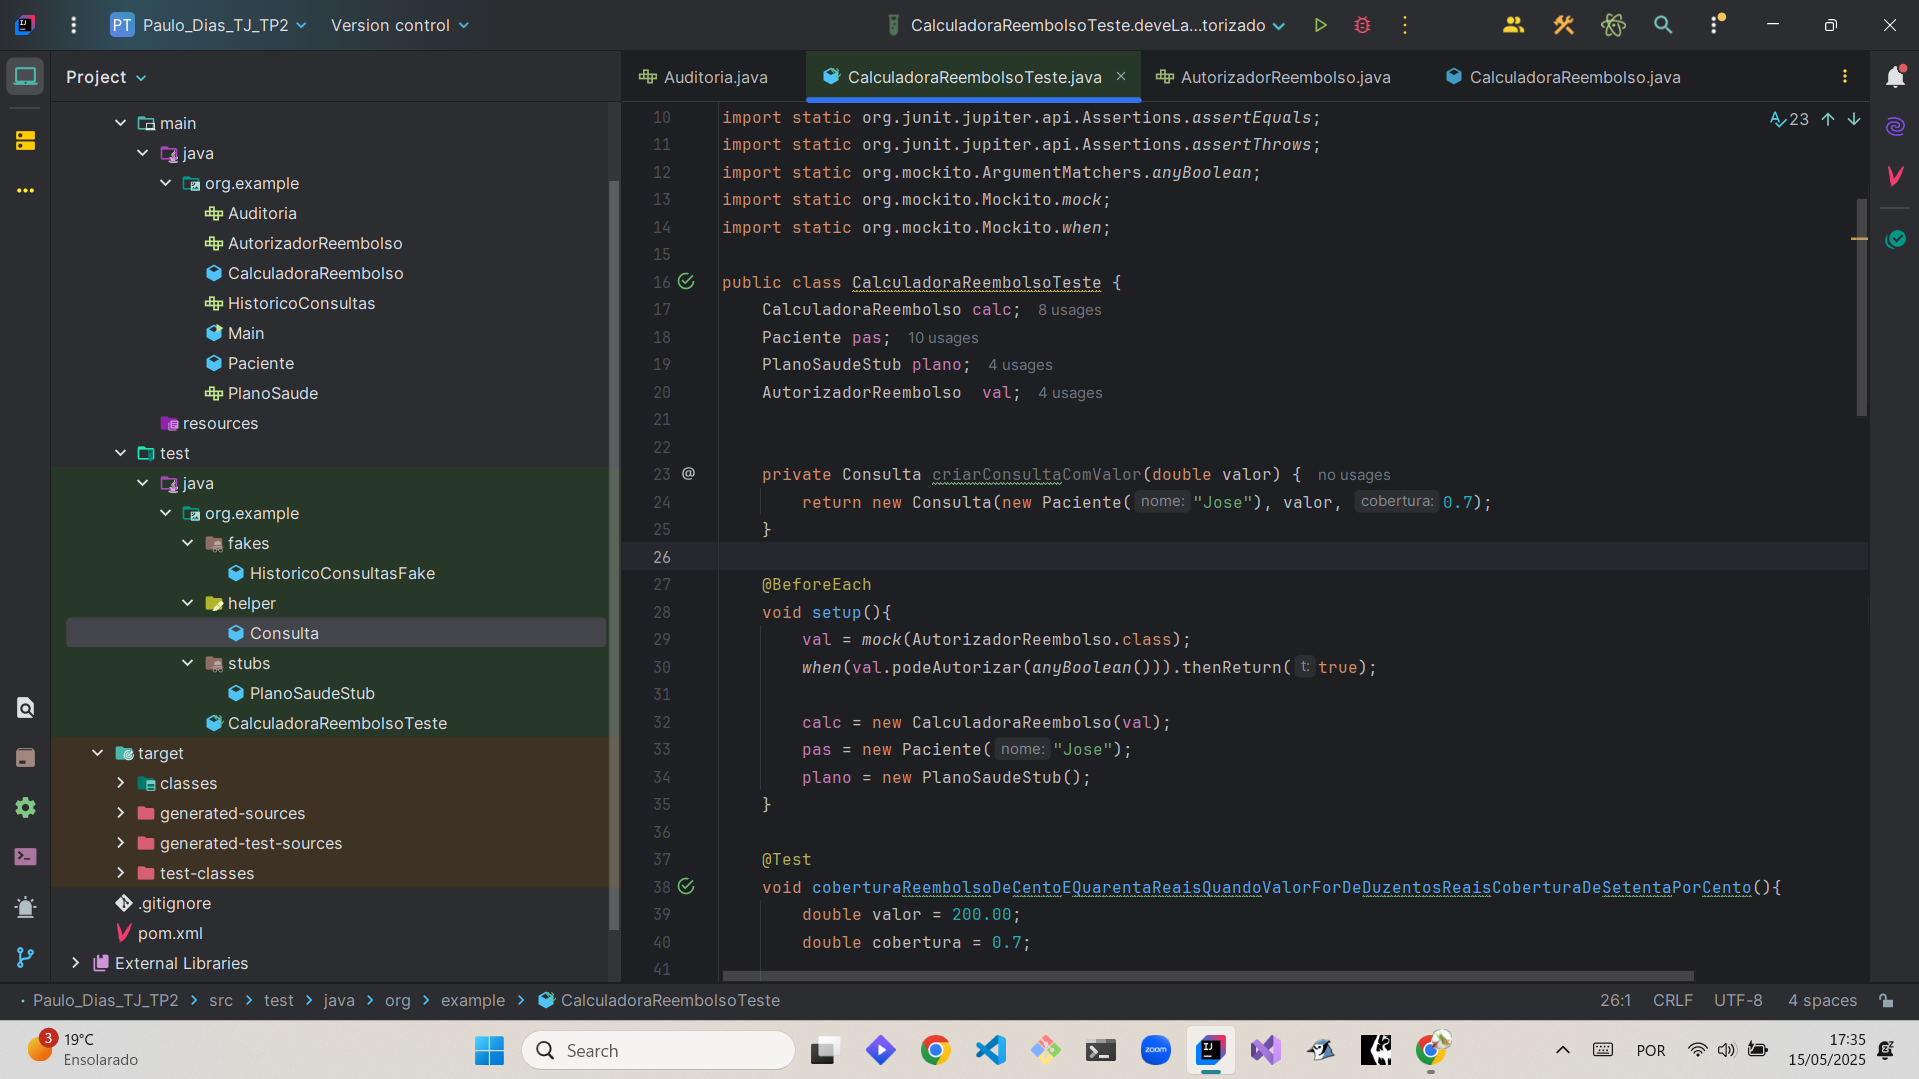

Aqui os três métodos com os dados alterados.

    @Test
    void coberturaReembolsoDeCentoEQuarentaReaisQuandoValorForDeDuzentosReaisCoberturaDeSetentaPorCento(){
        double valor = 200.00;
        //double cobertura = 0.7;



        Consulta res = criarConsultaComValor(valor);

        assertEquals(140, res.calcularReembolso());
    }

    @Test
    void coberturaReembolsoDeZeroReaisQuandoValorForDeZeroCoberturaDeSetentaPorCento(){
        double valor = 0;
        //double cobertura = 0.7;

        Consulta res = criarConsultaComValor(valor);

        assertEquals(0, res.calcularReembolso());
    }

    @Test
    void coberturaReembolsoDeSetentaReaisQuandoValorForDeCemReaisCoberturaDeSetentaPorCento(){
        double valor = 100.00;
        //double cobertura = 0.7;

        Consulta res = criarConsultaComValor(valor);

        assertEquals(70, res.calcularReembolso());
    }

### Exercício 10 - Comparação com Margem de Erro

Testes com números decimais podem falhar por pequenas diferenças. Crie uma função de apoio que compare dois valores com margem de erro de 0.01. Substitua as comparações diretas por essa função nos testes relevantes.

### Resolução do exercício 10

Neste caso, o assertEquals suporta um terceiro parâmetro como "período de diferença aceitável para validação do teste". Assim sendo adicioneu o valor de 0.01 como terceiro parâmetro do assertEquals para validação do exercício.

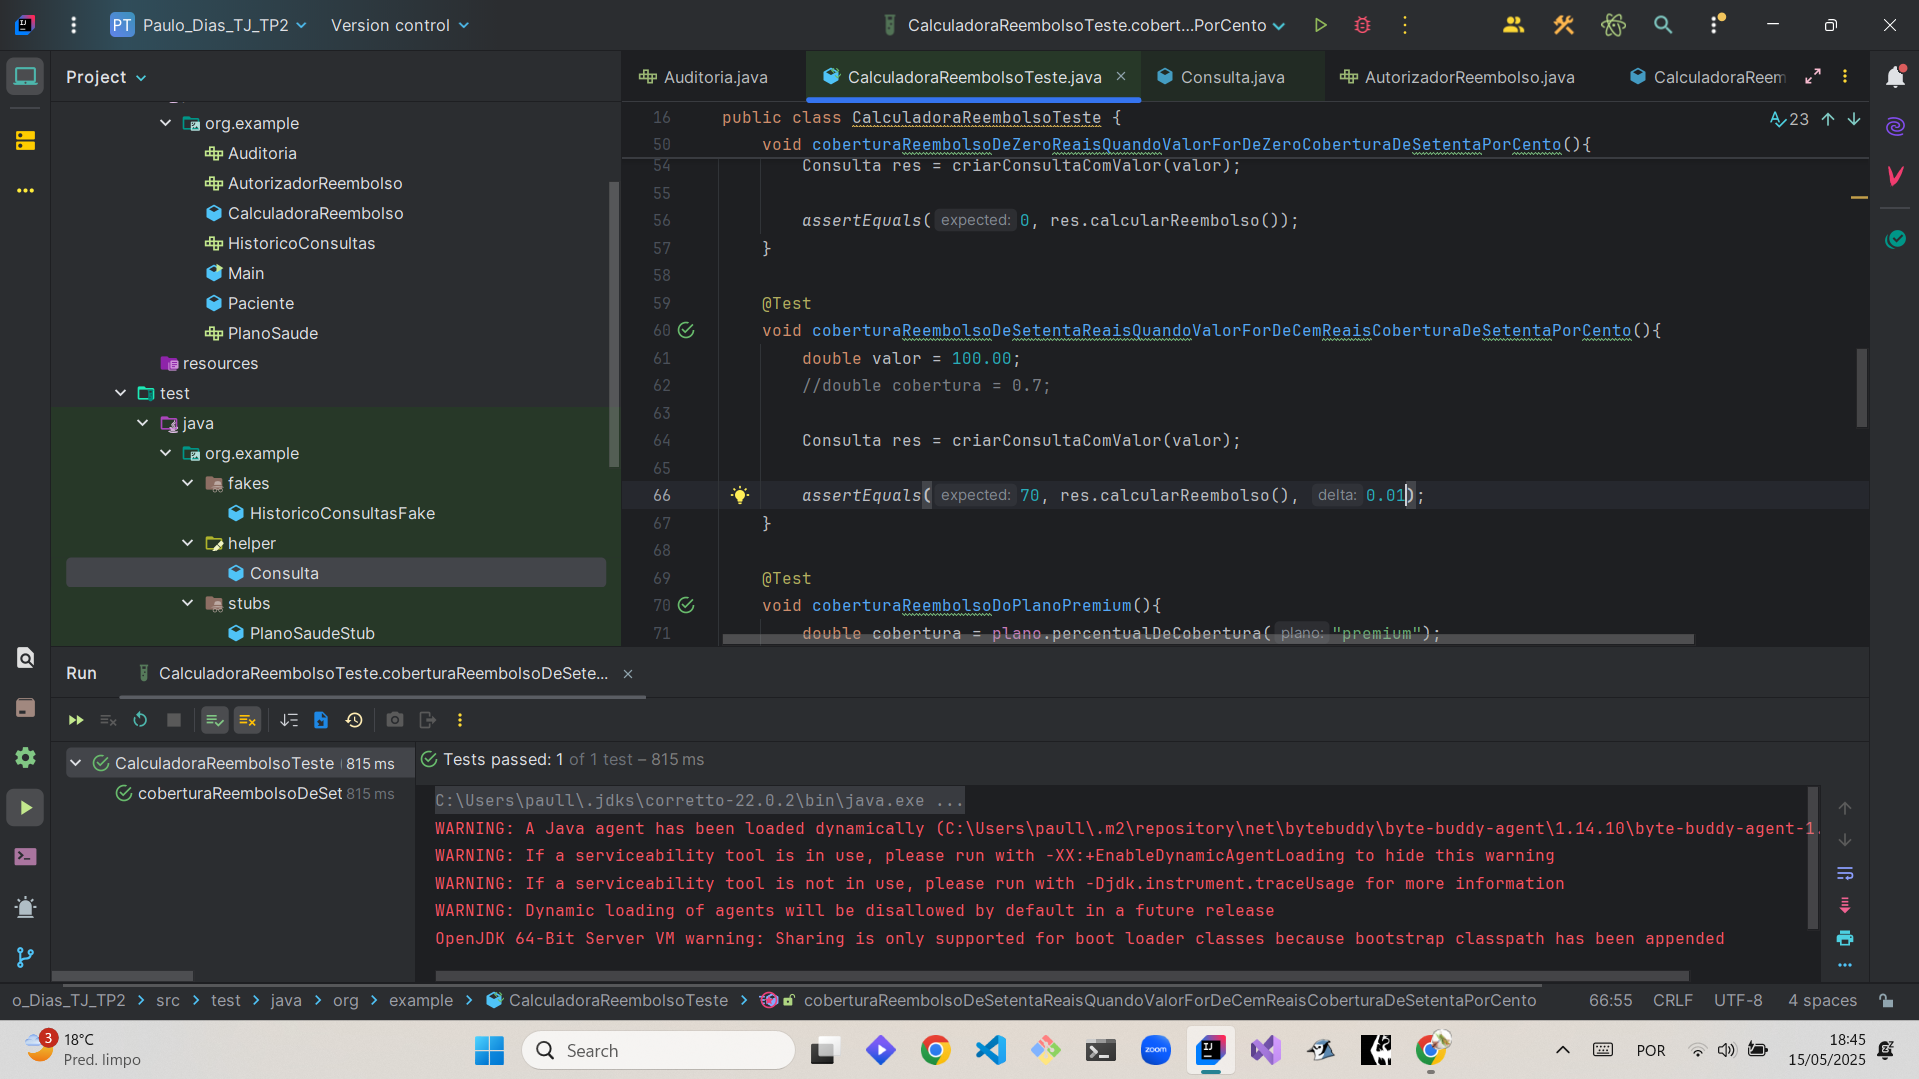

### Exercício 11 - Regras de Teto

A empresa decidiu que o valor máximo de reembolso será R$ 150 por consulta. Antes de programar, escreva testes que validem esse limite. Depois, ajuste a lógica para garantir esse comportamento.

### Resolução do exercício 11

Para este comportamento, implementei a validação diretamente na classe CalculadoraReembolso. A regra aplicada estabelece que o valor do reembolso não pode ultrapassar R$$150. Caso o cálculo do reembolso exceda esse limite, o valor retornado será fixado em R$150. Se o valor calculado estiver abaixo desse teto, o reembolso será feito proporcionalmente ao valor e à cobertura informados.

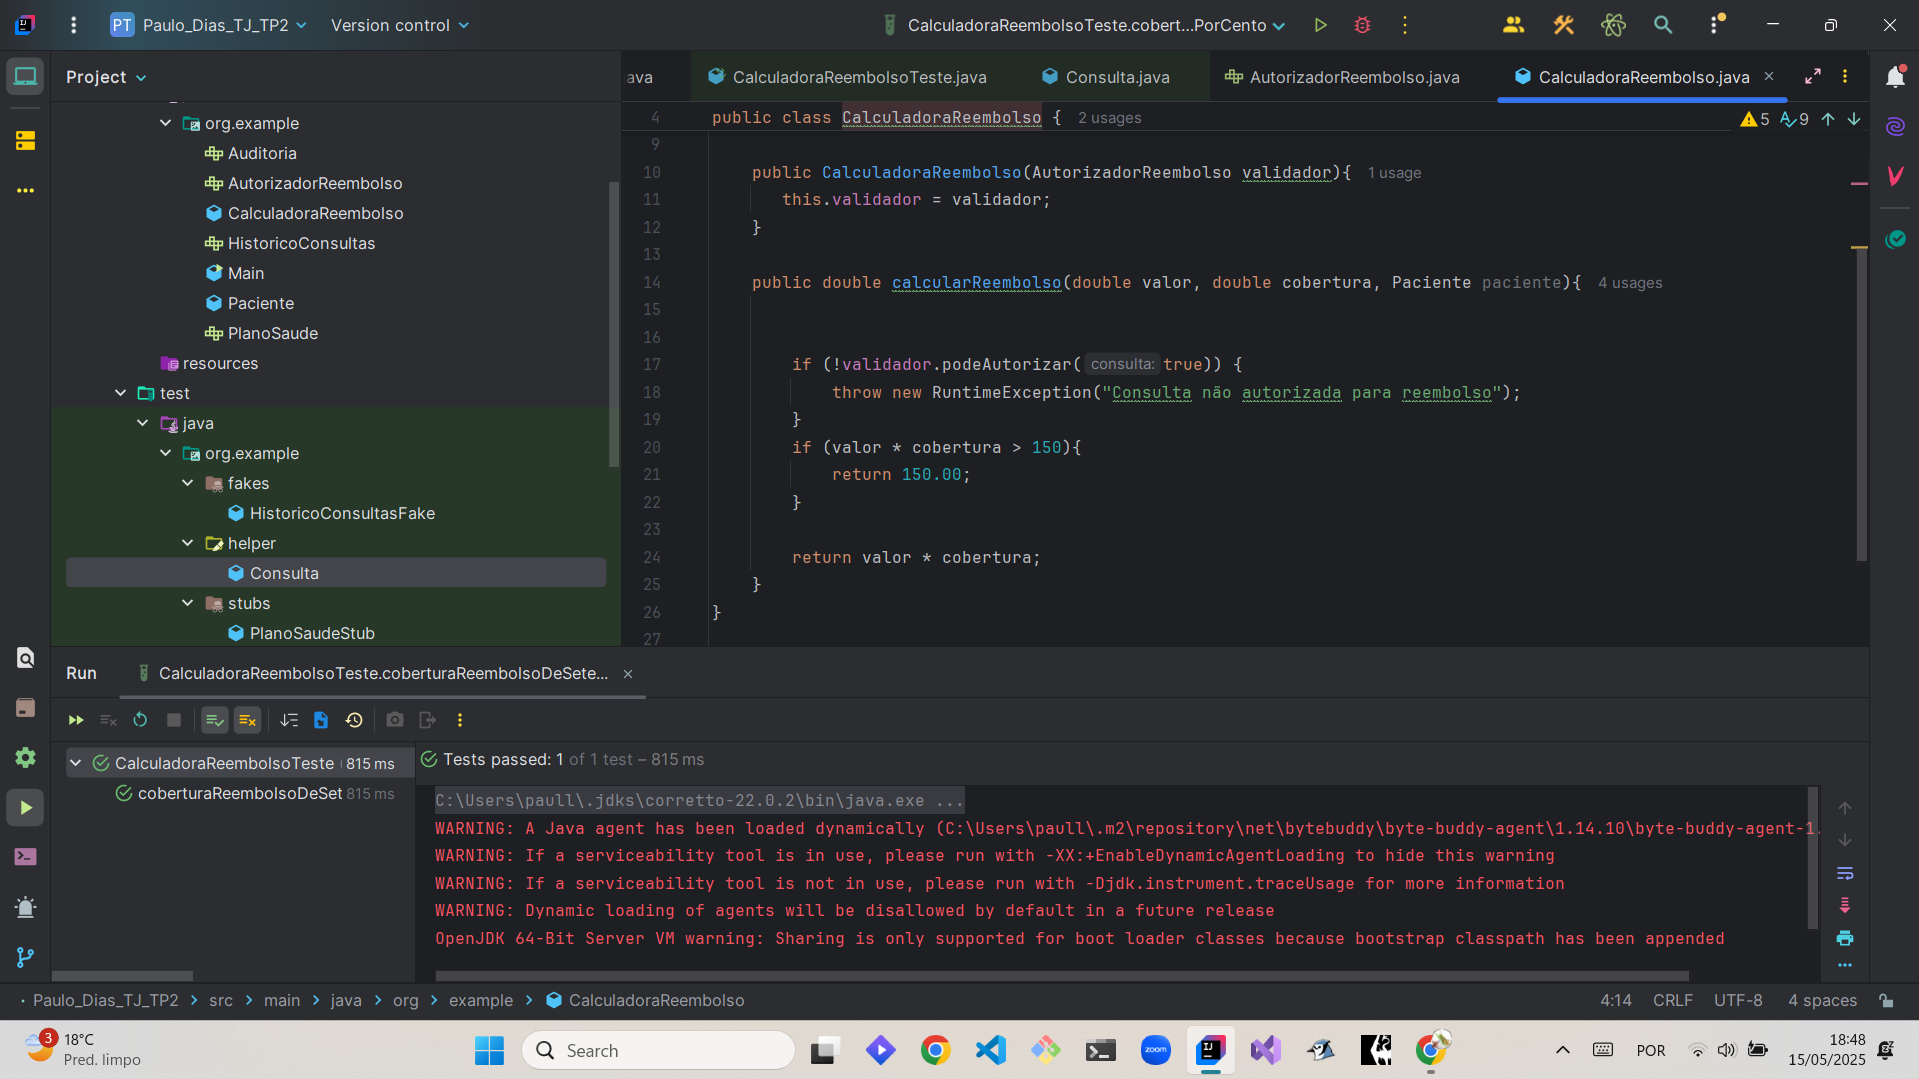

### Exercício 12 - Integração com Vários Dublês

Agora combine todos os elementos em um teste mais completo. Use um stub para PlanoSaude, um mock para AutorizadorReembolso e o helper de criação de consultas. Simule um cenário completo e valide o funcionamento conjunto dos componentes.

### Resolução do exercício 12

Para tal precisei realizar um pequeno ajuste no helper criado dentro de CalculadoraReembolsoTeste. Onde esse somente recebia o valor do exame, agora recebe o valor e a cobertura.

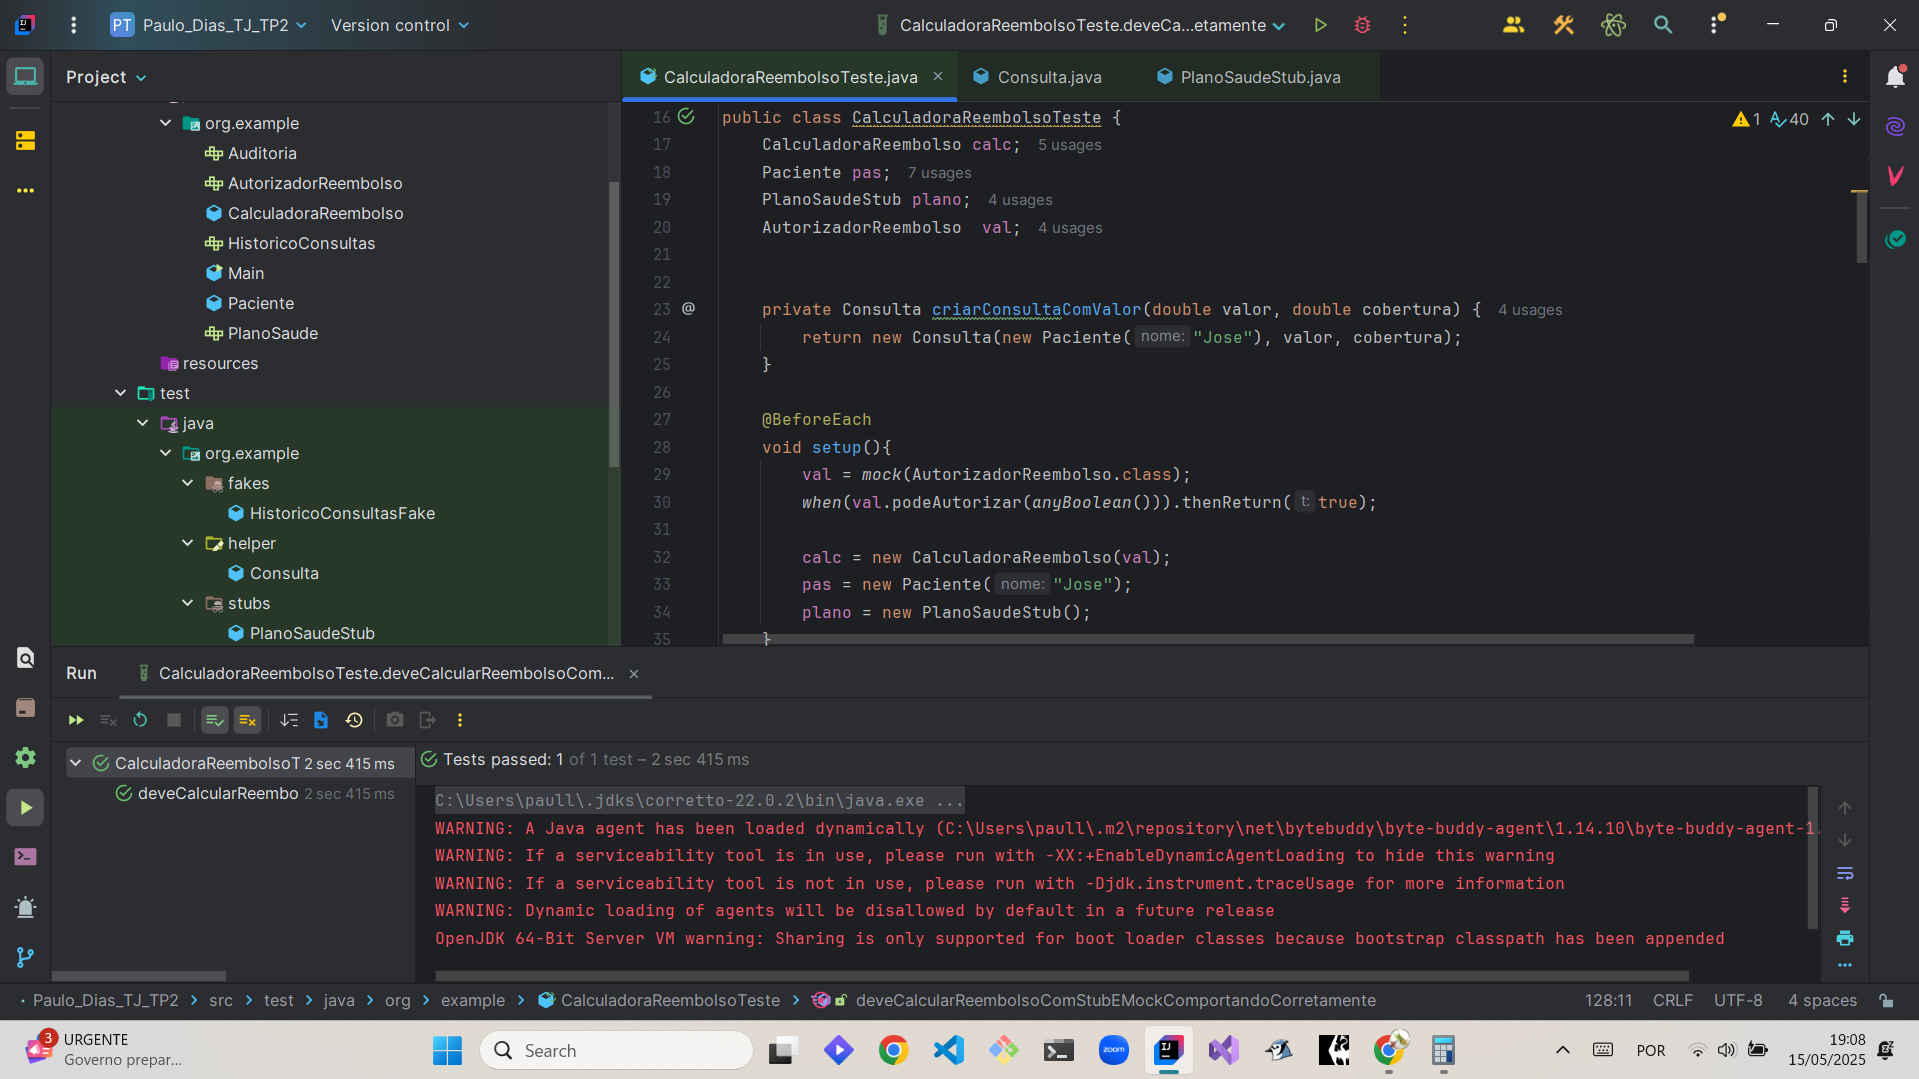

Para o teste, implementei o mock para verificação, mas como ele já está setado dentro do próprio beforeeach, não se faz necessário neste caso

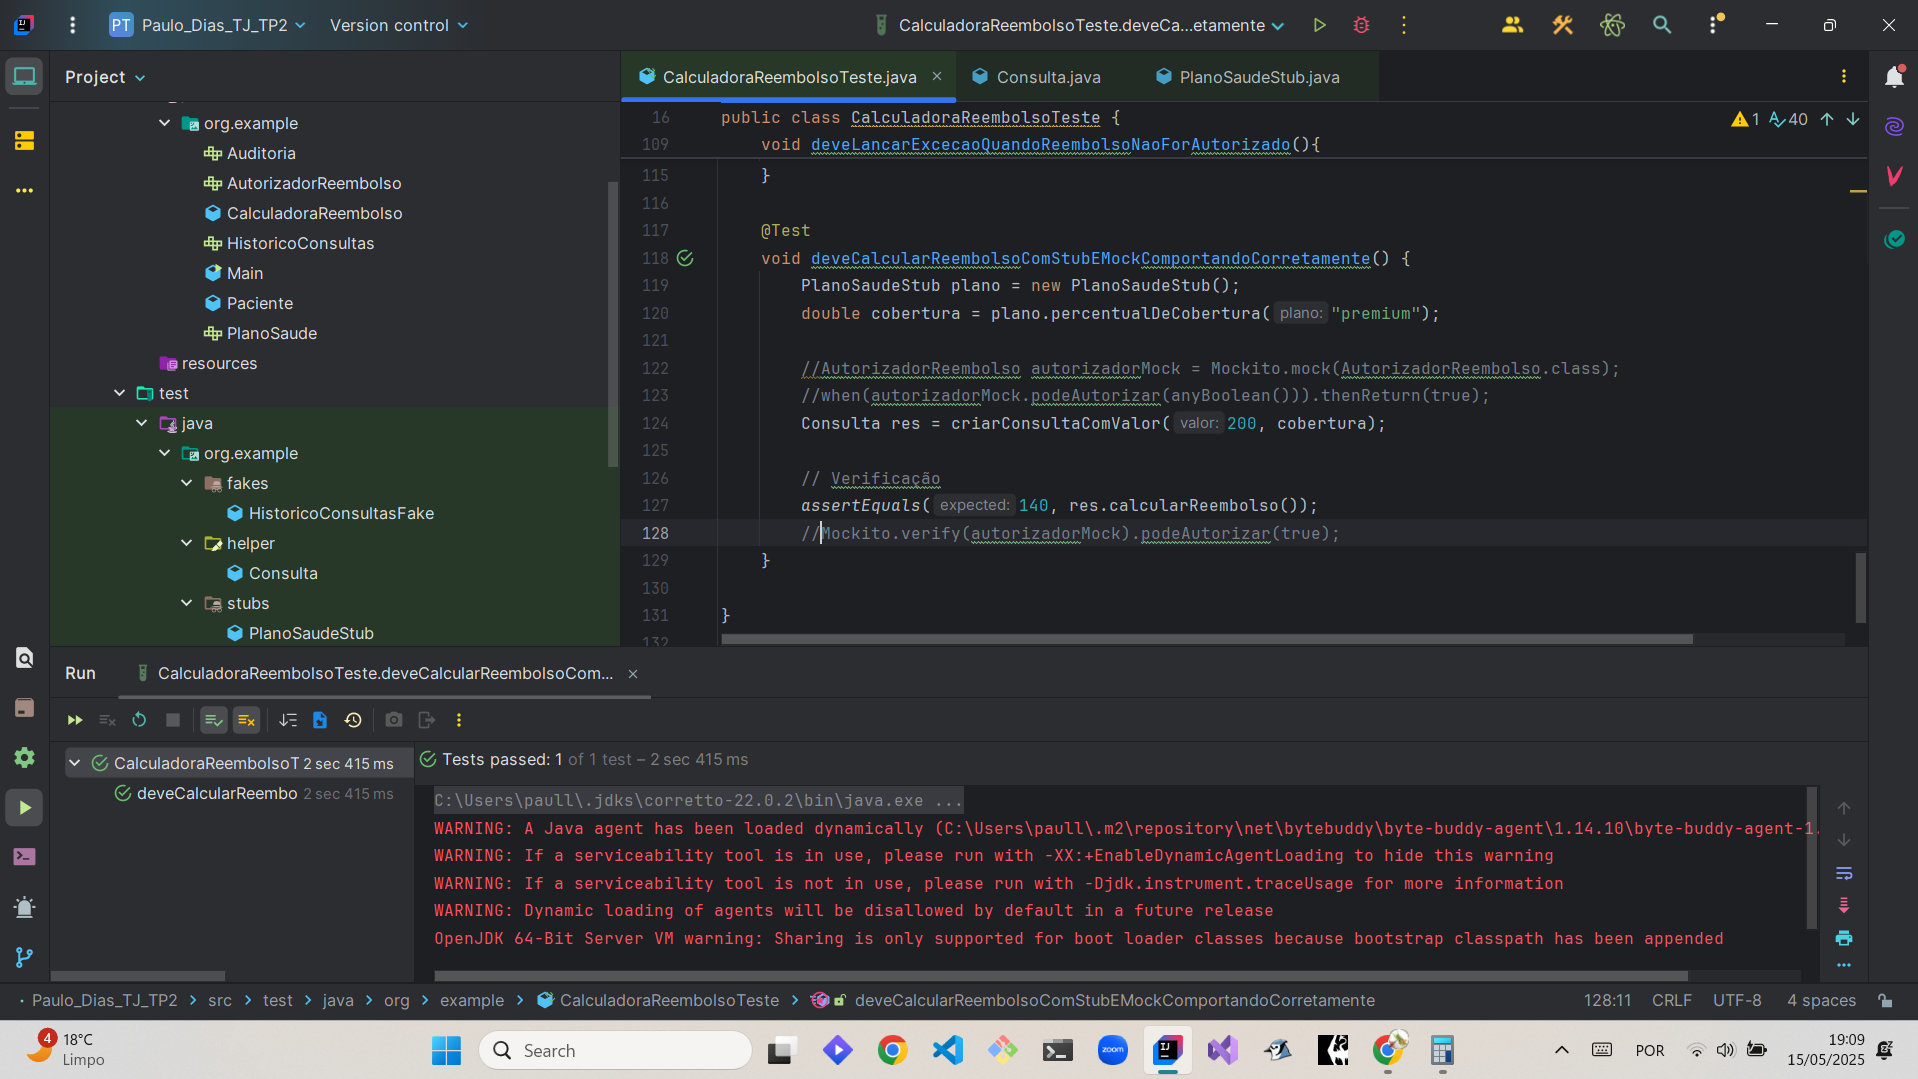